# MOVIE RECOMMENDATION
by : Ida Bagus Agung Bajerapany

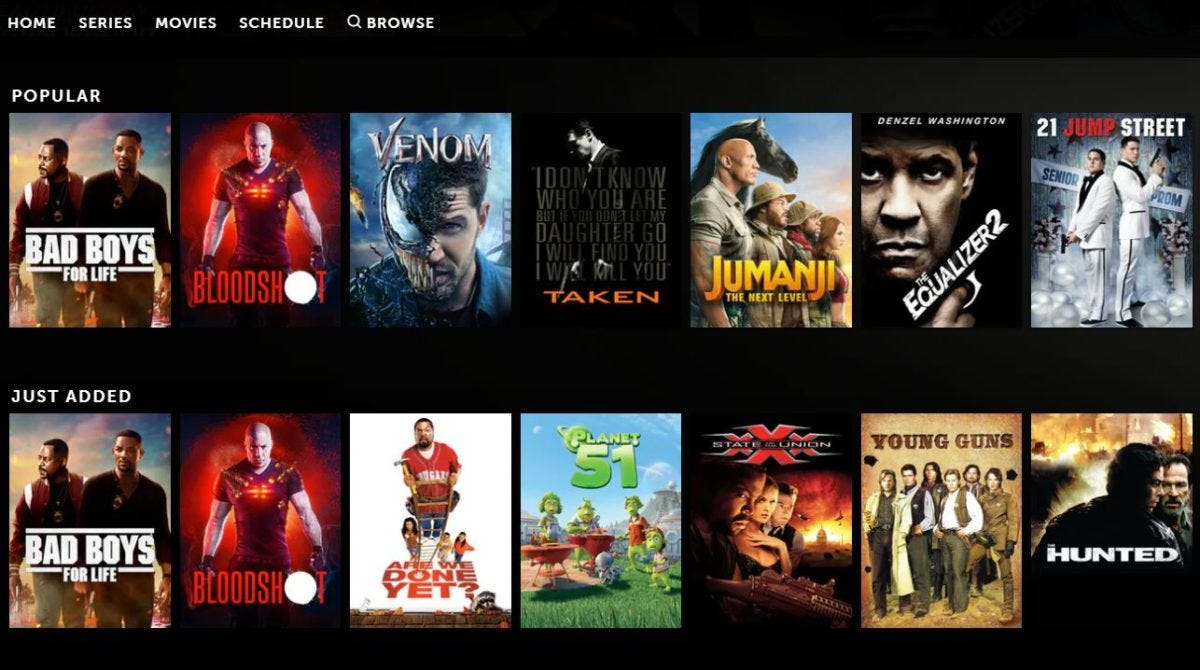

# DESKRIPSI PROYEK

Sistem rekomendasi film adalah alat penting yang membantu pengguna menemukan konten sesuai preferensi mereka di tengah banyaknya pilihan yang tersedia. Dengan semakin banyaknya film yang dirilis setiap tahun, sistem ini menawarkan solusi untuk memilih film yang tepat dengan memberikan saran berdasarkan interaksi pengguna sebelumnya dan karakteristik film. Terdapat dua pendekatan utama dalam pengembangan sistem rekomendasi: content-based filtering, yang merekomendasikan film berdasarkan kemiripan atribut dari film yang sudah disukai pengguna, seperti genre, sutradara, atau aktor, tanpa memerlukan data dari pengguna lain; dan collaborative filtering, yang memanfaatkan data interaksi dari banyak pengguna untuk menemukan pola dan hubungan antar film, sehingga dapat merekomendasikan film berdasarkan kesamaan preferensi di antara pengguna. Kombinasi kedua metode ini, atau pendekatan hybrid, terbukti meningkatkan akurasi dan relevansi rekomendasi, sekaligus mengatasi tantangan seperti data sparsity dan cold start. Dengan mengintegrasikan kedua pendekatan ini, sistem rekomendasi film tidak hanya meningkatkan pengalaman pengguna, tetapi juga memperluas jangkauan konten yang dapat ditemukan. Fokus proyek ini adalah mengembangkan sistem rekomendasi film yang menggabungkan content-based dan collaborative filtering. Berikut ini adalah plot metrik RMSE setelah proses pelatihan model.

# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import warnings
def warns(*args,**kwargs): pass
warnings.warn=warns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

import gc
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# DATA UNDERSTANDING

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut. Dalam data understanding ini terdapat beberapa fungsi dari library yang digunakan untuk memahami informasi yang ada pada dataset

## LOAD DATASET

Data loading merupakan tahap krusial dalam proses analisis data yang bertujuan untuk memuat dataset yang akan digunakan, sehingga data menjadi lebih mudah dipahami dan diolah. Pada tahap ini, dataset yang telah dipersiapkan sebelumnya, yang telah melalui proses pembersihan dan normalisasi oleh pembuatnya, siap untuk digunakan. Pembersihan data memastikan bahwa informasi yang terkandung bebas dari kesalahan dan inkonsistensi, sedangkan normalisasi membantu dalam menyelaraskan skala nilai agar siap untuk analisis lebih lanjut. Proses data loading yang efektif juga memfasilitasi integrasi data dari berbagai sumber, meningkatkan efisiensi dan akurasi dalam analisis yang dilakukan.



| Jenis | Keterangan |
| ------ | ------ |
| Title | _The Movies Dataset_ |
| Source | [Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data) |
| Maintainer | [Rounak Banik ⚡](https://www.kaggle.com/rounakbanik) |
| License | Data files © Original Authors |
| Visibility | Publik |
| Tags | _Movies and TV Shows_ |
| View | 1.87M |

In [ ]:
rating = pd.read_csv('DATASET/ratings.csv')
link_small = pd.read_csv('DATASET/links_small.csv')
credit = pd.read_csv('DATASET/credits.csv')
keyword = pd.read_csv('DATASET/keywords.csv')
metadata = pd.read_csv('DATASET/movies_metadata.csv')
rating_small = pd.read_csv('DATASET/ratings_small.csv')
link = pd.read_csv('DATASET/links.csv')

Melakukan loading keseluruhan data yang terdapat pada dataset. adapun penjelasan dari masing-masing kolom pada dataset sebagai berikut ini :

- movies_metadata.csv: Ini adalah file metadata film utama yang mencakup informasi tentang 45.000 film yang terdapat dalam dataset MovieLens lengkap. File ini berisi berbagai fitur seperti poster film, backdrop, anggaran, pendapatan, tanggal rilis, bahasa, serta negara dan perusahaan produksi. Data ini sangat berguna bagi siapa saja yang tertarik untuk menganalisis atau memahami lebih dalam tentang film yang ada.
- keywords.csv: File ini berisi kata kunci plot untuk film-film yang ada dalam MovieLens. Data disajikan dalam bentuk objek JSON yang ter-string, yang memungkinkan pengguna untuk dengan mudah mengidentifikasi tema atau elemen penting dari masing-masing film berdasarkan kata kunci tersebut.
- credits.csv: File ini menyediakan informasi mengenai pemeran dan kru untuk semua film dalam dataset. Seperti keywords, data di sini juga disajikan dalam bentuk JSON yang telah diubah menjadi string, yang memudahkan untuk melihat siapa saja yang terlibat dalam produksi film tersebut, termasuk sutradara, produser, serta anggota cast lainnya.
- links.csv: Ini adalah file yang mencantumkan ID TMDB (The Movie Database) dan IMDB (Internet Movie Database) untuk semua film yang terdapat dalam dataset MovieLens. ID ini sangat penting jika Anda ingin menemukan informasi lebih lanjut mengenai film di platform luar atau untuk integrasi dengan sistem lain.
- links_small.csv: Merupakan versi kecil dari file links.csv, yang hanya mencakup ID TMDB dan IMDB dari subset yang lebih kecil yaitu 9.000 film dari keseluruhan dataset. Ini berguna untuk analisis yang lebih cepat dan ringan, khususnya saat bekerja dengan jumlah data yang lebih sedikit.
- ratings_small.csv: File ini berisi subset 100.000 rating yang diberikan oleh 700 pengguna untuk 9.000 film. Data ini memungkinkan analisis perilaku penonton, tren rating, serta membantu dalam pengembangan model rekomendasi film yang lebih baik.

In [ ]:
print('-'*20, ' SHAPES ', '-'*20)
print('1. Ratings: ', rating.shape)
print('2. Links Small: ', link_small.shape)
print('3. Credits: ', credit.shape)
print('4. Keywords: ', keyword.shape)
print('5. Meta Data: ', metadata.shape)
print('6. Ratings Small: ', rating_small.shape)
print('7. Links: ', link.shape)

--------------------  SHAPES  --------------------
1. Ratings:  (26024289, 4)
2. Links Small:  (9125, 3)
3. Credits:  (45476, 3)
4. Keywords:  (46419, 2)
5. Meta Data:  (45466, 24)
6. Ratings Small:  (100004, 4)
7. Links:  (45843, 3)


Dapat dilihat dari hasil diatas merupakan jumlah data dan kolom pada setiap dataset

In [ ]:
print('='*20, ' COLUMNS ', '='*20)

print('\n', '-'*20, '1. Ratings ', '-'*20)
print(rating.columns)

print('\n', '-'*20, '2. Links Small ', '-'*20)
print(link_small.columns)

print('\n', '-'*20, '3. Credits ', '-'*20)
print(credit.columns)

print('\n', '-'*20, '4. Keywords ', '-'*20)
print(keyword.columns)

print('\n', '-'*20, '5. Meta Data ', '-'*20)
print(metadata.columns)

print('\n', '-'*20, '6. Ratings Small ', '-'*20)
print(rating_small.columns)

print('\n', '-'*20, '7. Links ', '-'*20)
print(link.columns)

====================  COLUMNS  ====================

 -------------------- 1. Ratings  --------------------
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

 -------------------- 2. Links Small  --------------------
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

 -------------------- 3. Credits  --------------------
Index(['cast', 'crew', 'id'], dtype='object')

 -------------------- 4. Keywords  --------------------
Index(['id', 'keywords'], dtype='object')

 -------------------- 5. Meta Data  --------------------
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

 -------------------- 6. Ratings Small  ------

dapat dilihat pada gambar diatas merupakan kolom-kolom yang terdapat pada dataset. kolom ini yang nantinya akan digunakan pada tahap analisis lebih lanjut.

## KONDISI DATA

RATING

In [ ]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
rating.duplicated().sum()

0

LINK SMALL

In [ ]:
link_small.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

In [ ]:
link_small.duplicated().sum()

0

CREDIT

In [ ]:
credit.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [ ]:
credit.duplicated().sum()

37

KEYWORD

In [ ]:
keyword.isnull().sum()

id          0
keywords    0
dtype: int64

In [ ]:
keyword.duplicated().sum()

987

METADATA

In [ ]:
metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
metadata.duplicated().sum()

13

RATING SMALL

In [ ]:
rating_small.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
rating_small.duplicated().sum()

0

LINK

In [ ]:
link.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [ ]:
link.duplicated().sum()

0

# EDA

Exploratory Data Analysis (EDA) merupakn proses investigasi awal yang sangat penting dalam analisis data, di mana kita melakukan analisis menyeluruh terhadap karakteristik dataset untuk mengungkap berbagai informasi yang terkandung di dalamnya. Dalam tahap ini, tujuan utama adalah untuk memahami struktur dan pola dalam data, menemukan anomali atau outlier yang mungkin menunjukkan kesalahan pencatatan atau fenomena menarik lainnya, serta memeriksa asumsi yang ada tentang hubungan antarvariabel. Teknik EDA memanfaatkan metode statistik deskriptif, seperti penghitungan rata-rata, median, dan standar deviasi, untuk memberikan gambaran numerik tentang data. Selain itu, visualisasi grafis menjadi alat yang sangat efektif dalam EDA; plot dan grafik seperti histogram, scatter plot, dan box plot memungkinkan kita untuk melihat distribusi data, pola, dan hubungan antarvariabel secara lebih jelas.

## METADATA

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

dapat dilihat diatas merupakan kolom, jumlah data dan tipe data yang terdapat pada kolom metadata

In [ ]:
metadata.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [ ]:
selected_features = ['adult', 'title', 'original_title', 'belongs_to_collection', 'genres', 'spoken_languages', 'production_companies',
                     'production_countries', 'original_language', 'overview', 'popularity', 'poster_path', 'release_date', 'budget',
                     'revenue', 'runtime', 'status', 'tagline', 'video', 'vote_average', 'vote_count']
selected_features

['adult',
 'title',
 'original_title',
 'belongs_to_collection',
 'genres',
 'spoken_languages',
 'production_companies',
 'production_countries',
 'original_language',
 'overview',
 'popularity',
 'poster_path',
 'release_date',
 'budget',
 'revenue',
 'runtime',
 'status',
 'tagline',
 'video',
 'vote_average',
 'vote_count']

In [ ]:
new_metadata = metadata[['id'] + selected_features]
print("Shape: ", new_metadata.shape)

Shape:  (45466, 22)


data diatas merupakan jumlah dari data yang terdapat pada dataset metadata

In [ ]:
new_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45466 non-null  object 
 1   adult                  45466 non-null  object 
 2   title                  45460 non-null  object 
 3   original_title         45466 non-null  object 
 4   belongs_to_collection  4494 non-null   object 
 5   genres                 45466 non-null  object 
 6   spoken_languages       45460 non-null  object 
 7   production_companies   45463 non-null  object 
 8   production_countries   45463 non-null  object 
 9   original_language      45455 non-null  object 
 10  overview               44512 non-null  object 
 11  popularity             45461 non-null  object 
 12  poster_path            45080 non-null  object 
 13  release_date           45379 non-null  object 
 14  budget                 45466 non-null  object 
 15  re

In [ ]:
print("\n", new_metadata.isna().sum())


 id                           0
adult                        0
title                        6
original_title               0
belongs_to_collection    40972
genres                       0
spoken_languages             6
production_companies         3
production_countries         3
original_language           11
overview                   954
popularity                   5
poster_path                386
release_date                87
budget                       0
revenue                      6
runtime                    263
status                      87
tagline                  25054
video                        6
vote_average                 6
vote_count                   6
dtype: int64


hasil diatas merupakan jumlah data yang kosong pada dataset metadata

In [ ]:
new_metadata.drop(new_metadata[new_metadata['release_date'].isna()].index, inplace=True)
new_metadata.drop(new_metadata[~new_metadata['release_date'].str.contains('-')].index, inplace=True)

In [ ]:
new_metadata['year'] = new_metadata['release_date'].str.split('-').str[0].astype(int)
new_metadata['month'] = new_metadata['release_date'].str.split('-').str[1].astype(int)
new_metadata['day'] = new_metadata['release_date'].str.split('-').str[2].astype(int)
new_metadata['day_name'] = pd.to_datetime(new_metadata['release_date']).dt.day_name()
new_metadata.drop(['release_date'], axis=1, inplace=True)

In [ ]:
new_metadata['budget'] = pd.to_numeric(new_metadata['budget'], errors='coerce')
new_metadata['budget'] = new_metadata['budget'].replace(0, np.nan)
new_metadata['revenue'] = new_metadata['revenue'].replace(0, np.nan)
new_metadata['popularity'] = pd.to_numeric(new_metadata['popularity'], errors='coerce')
new_metadata['vote_average'] = new_metadata['vote_average'].astype(float)
new_metadata['vote_count'] = new_metadata['vote_count'].astype(float)

kode diatas digunakan untuk merubah tipe data yang terdapat pada metadata

In [ ]:
print("Shape: ", new_metadata.shape)

Shape:  (45376, 25)


In [ ]:
new_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45376 non-null  object 
 1   adult                  45376 non-null  object 
 2   title                  45376 non-null  object 
 3   original_title         45376 non-null  object 
 4   belongs_to_collection  4488 non-null   object 
 5   genres                 45376 non-null  object 
 6   spoken_languages       45376 non-null  object 
 7   production_companies   45376 non-null  object 
 8   production_countries   45376 non-null  object 
 9   original_language      45365 non-null  object 
 10  overview               44435 non-null  object 
 11  popularity             45376 non-null  float64
 12  poster_path            45037 non-null  object 
 13  budget                 8886 non-null   float64
 14  revenue                7407 non-null   float64
 15  runtime

In [ ]:
new_metadata.head()

id  adult                        title               original_title  \
0    862  False                    Toy Story                    Toy Story   
1   8844  False                      Jumanji                      Jumanji   
2  15602  False             Grumpier Old Men             Grumpier Old Men   
3  31357  False            Waiting to Exhale            Waiting to Exhale   
4  11862  False  Father of the Bride Part II  Father of the Bride Part II   

                               belongs_to_collection  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...   
1                                                NaN   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...   
3                                                NaN   
4  {'id': 96871, 'name': 'Father of the Bride Col...   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                    spoken_languages  \
0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2           [{'iso_639_1': 'en', 'name': 'English'}]   
3           [{'iso_639_1': 'en', 'name': 'English'}]   
4           [{'iso_639_1': 'en', 'name': 'English'}]   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries original_language  ...  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
1  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
2  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
3  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
4  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   

  runtime    status                                            tagline  video  \
0    81.0  Released                                                NaN  False   
1   104.0  Released          Roll the dice and unleash the excitement!  False   
2   101.0  Released  Still Yelling. Still Fighting. Still Ready for...  False   
3   127.0  Released  Friends are the people who let you be yourself...  False   
4   106.0  Released  Just When His World Is Back To Normal... He's ...  False   

   vote_average  vote_count  year month day  day_name  
0           7.7      5415.0  1995    10  30    Monday  
1           6.9      2413.0  1995    12  15    Friday  
2           6.5        92.0  1995    12  22    Friday  
3           6.1        34.0  1995    12  22    Friday  
4           5.7       173.0  1995     2  10    Friday  

[5 rows x 25 columns]

In [ ]:
new_metadata.drop(new_metadata[(new_metadata['adult'] != 'False') & (new_metadata['adult'] != 'True')].index, inplace=True)

In [ ]:
new_metadata.head()

id  adult                        title               original_title  \
0    862  False                    Toy Story                    Toy Story   
1   8844  False                      Jumanji                      Jumanji   
2  15602  False             Grumpier Old Men             Grumpier Old Men   
3  31357  False            Waiting to Exhale            Waiting to Exhale   
4  11862  False  Father of the Bride Part II  Father of the Bride Part II   

                               belongs_to_collection  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...   
1                                                NaN   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...   
3                                                NaN   
4  {'id': 96871, 'name': 'Father of the Bride Col...   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                    spoken_languages  \
0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2           [{'iso_639_1': 'en', 'name': 'English'}]   
3           [{'iso_639_1': 'en', 'name': 'English'}]   
4           [{'iso_639_1': 'en', 'name': 'English'}]   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries original_language  ...  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
1  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
2  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
3  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
4  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   

  runtime    status                                            tagline  video  \
0    81.0  Released                                                NaN  False   
1   104.0  Released          Roll the dice and unleash the excitement!  False   
2   101.0  Released  Still Yelling. Still Fighting. Still Ready for...  False   
3   127.0  Released  Friends are the people who let you be yourself...  False   
4   106.0  Released  Just When His World Is Back To Normal... He's ...  False   

   vote_average  vote_count  year month day  day_name  
0           7.7      5415.0  1995    10  30    Monday  
1           6.9      2413.0  1995    12  15    Friday  
2           6.5        92.0  1995    12  22    Friday  
3           6.1        34.0  1995    12  22    Friday  
4           5.7       173.0  1995     2  10    Friday  

[5 rows x 25 columns]

In [ ]:
new_metadata.isna().sum()

id                           0
adult                        0
title                        0
original_title               0
belongs_to_collection    40888
genres                       0
spoken_languages             0
production_companies         0
production_countries         0
original_language           11
overview                   941
popularity                   0
poster_path                339
budget                   36490
revenue                  37969
runtime                    246
status                      80
tagline                  24978
video                        0
vote_average                 0
vote_count                   0
year                         0
month                        0
day                          0
day_name                     0
dtype: int64

PRODUCTION STATUS MOVIE

In [ ]:
print("Total Number of Movies: ", len(new_metadata['status']))

Total Number of Movies:  45376


In [ ]:
print("-"*5, " Movies Status Statics ", "-"*5)
new_metadata['status'].value_counts()

-----  Movies Status Statics  -----


status
Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

hasil diatas merupakan status movie yang terdapat pada dataset

ADULT MOVIE

In [ ]:
new_metadata['adult'].value_counts()

adult
False    45368
True         8
Name: count, dtype: int64

hasil diatas merupakan status adult movie pada dataset

In [ ]:
selected_features = ['adult', 'title', 'original_title', 'belongs_to_collection', 'genres', 'spoken_languages', 'production_companies',
                     'production_countries', 'original_language', 'overview', 'popularity', 'poster_path', 'budget', 'revenue',
                     'runtime', 'status', 'tagline', 'video', 'vote_average', 'vote_count', 'year', 'month', 'day']
selected_features

['adult',
 'title',
 'original_title',
 'belongs_to_collection',
 'genres',
 'spoken_languages',
 'production_companies',
 'production_countries',
 'original_language',
 'overview',
 'popularity',
 'poster_path',
 'budget',
 'revenue',
 'runtime',
 'status',
 'tagline',
 'video',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [ ]:
metadata_recreated = new_metadata[['id'] + selected_features]
print("Shape: ", metadata_recreated.shape)

Shape:  (45376, 24)


In [ ]:
print(metadata_recreated.isna().sum() )

id                           0
adult                        0
title                        0
original_title               0
belongs_to_collection    40888
genres                       0
spoken_languages             0
production_companies         0
production_countries         0
original_language           11
overview                   941
popularity                   0
poster_path                339
budget                   36490
revenue                  37969
runtime                    246
status                      80
tagline                  24978
video                        0
vote_average                 0
vote_count                   0
year                         0
month                        0
day                          0
dtype: int64


In [ ]:
metadata_recreated.head()

id  adult                        title               original_title  \
0    862  False                    Toy Story                    Toy Story   
1   8844  False                      Jumanji                      Jumanji   
2  15602  False             Grumpier Old Men             Grumpier Old Men   
3  31357  False            Waiting to Exhale            Waiting to Exhale   
4  11862  False  Father of the Bride Part II  Father of the Bride Part II   

                               belongs_to_collection  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...   
1                                                NaN   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...   
3                                                NaN   
4  {'id': 96871, 'name': 'Father of the Bride Col...   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                    spoken_languages  \
0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2           [{'iso_639_1': 'en', 'name': 'English'}]   
3           [{'iso_639_1': 'en', 'name': 'English'}]   
4           [{'iso_639_1': 'en', 'name': 'English'}]   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries original_language  ...  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
1  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
2  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
3  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   
4  [{'iso_3166_1': 'US', 'name': 'United States o...                en  ...   

       revenue  runtime    status  \
0  373554033.0     81.0  Released   
1  262797249.0    104.0  Released   
2          NaN    101.0  Released   
3   81452156.0    127.0  Released   
4   76578911.0    106.0  Released   

                                             tagline  video  vote_average  \
0                                                NaN  False           7.7   
1          Roll the dice and unleash the excitement!  False           6.9   
2  Still Yelling. Still Fighting. Still Ready for...  False           6.5   
3  Friends are the people who let you be yourself...  False           6.1   
4  Just When His World Is Back To Normal... He's ...  False           5.7   

  vote_count  year month  day  
0     5415.0  1995    10   30  
1     2413.0  1995    12   15  
2       92.0  1995    12   22  
3       34.0  1995    12   22  
4      173.0  1995     2   10  

[5 rows x 24 columns]

MISSING VALUE

In [ ]:
print("Shape: ", metadata_recreated.shape)
metadata_recreated['belongs_to_collection'] = '[' + metadata_recreated['belongs_to_collection'] + ']'

Shape:  (45376, 24)


In [ ]:
print(metadata_recreated.isna().sum())

id                           0
adult                        0
title                        0
original_title               0
belongs_to_collection    40888
genres                       0
spoken_languages             0
production_companies         0
production_countries         0
original_language           11
overview                   941
popularity                   0
poster_path                339
budget                   36490
revenue                  37969
runtime                    246
status                      80
tagline                  24978
video                        0
vote_average                 0
vote_count                   0
year                         0
month                        0
day                          0
dtype: int64


In [ ]:
metadata_recreated.fillna('unknown', inplace=True)

melakukan replace value yang kosong menjadi unknown

In [ ]:
print(metadata_recreated.isna().sum())

id                       0
adult                    0
title                    0
original_title           0
belongs_to_collection    0
genres                   0
spoken_languages         0
production_companies     0
production_countries     0
original_language        0
overview                 0
popularity               0
poster_path              0
budget                   0
revenue                  0
runtime                  0
status                   0
tagline                  0
video                    0
vote_average             0
vote_count               0
year                     0
month                    0
day                      0
dtype: int64


## VISUALISASI

pada bagian visualisai ini akan dipaparkan visualisasi data yang dapat menambah wawasan mengenai dataset

In [ ]:
import ast
def getDataList(df, xfeature):
    xlst = []
    for x, xRows in df.iterrows():
        target_column = xRows[xfeature]
        if (target_column != 'unknown'):
            strName = ast.literal_eval( target_column )
            for i in strName:
                if(i['name'] != ''):
                    xlst.append(i['name'])
        else:
            xlst.append('unknown')
    return xlst

PIE CHART FUNCTION

In [ ]:
# Create Function for PIE Graph
def myPieChart(df, xName, lblName, myTitle, myXplode, rotlbl):
    x = df[xName]
    labels = lblName

    fig, ax = plt.subplots(figsize=(8, 8))
    patches, texts, pcts = ax.pie(
        x, labels = labels, autopct='%.1f%%',
        wedgeprops = {'linewidth': 3.0, 'edgecolor': 'white'},
        textprops = {'size': 'small', 'weight':400},
        labeldistance = 1.04,
#        rotatelabels = rotlbl,
#        explode = myXplode,
        startangle = 90)

    # Set corresponding label color
    for i, patch in enumerate(patches):
        texts[i].set_color(patch.get_facecolor())
        texts[i].set_fontsize(12)

    plt.setp(pcts, color='white')
    plt.setp(texts, fontweight=600)
    ax.set_title(myTitle, fontsize=15, color= 'green', fontweight='bold')

    plt.tight_layout()

COUNT AND PERCENTAGE GRAPH FUNCTION

In [ ]:
def count_percent_graph(df, txtTitle):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])


    fig.add_trace(go.Bar(y = df['count'],
                         x = df['name'],
                         text = df['count'],
                         textfont = dict(size=15),
                         textposition = 'outside',
                         showlegend = False,
                         marker = dict(color = 'lightblue',
                                       line_color = 'black',
                                       line_width=3)),row = 1,col = 1)

    fig.add_trace((go.Pie(labels = df['name'],
                          values = df['count'],
                          textfont = dict(size = 16),
                          textposition = 'auto',
                          showlegend = True,)), row = 1, col = 2)

    fig.update_layout(title={'text': txtTitle,
                             'y':0.95,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'}, width=800, height=800,
                      template = 'plotly_white')
    #fig.update_yaxes(range=[0,22000])
    iplot(fig)

WORD CLOUD FUNCTION

In [ ]:
# Import Library for WordCloud
from wordcloud import WordCloud, STOPWORDS

# Create Function for WordCloud Analysis
def xWordCloud(xtext):
    xStr = ' '.join(xtext)
    xtitleWordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1000, width=2000).generate(xStr)
    plt.figure(figsize=(14,8))
    plt.imshow(xtitleWordcloud)
    plt.axis('off')
    plt.show()

MOVIE ORIGINAL LANGUAGE

In [ ]:
dfmovies_original_lang = pd.DataFrame(columns=['name', 'count'])
dfmovies_original_lang['name'] = metadata['original_language'] # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_original_lang.shape ) # Shape of Dataset

dfmovies_original_lang = dfmovies_original_lang.groupby('name').agg({'count': 'size'}).reset_index().sort_values('count', ascending=False)
print("\nDataset Shape: ", dfmovies_original_lang.shape ) # Shape of Dataset
dfmovies_original_lang.head(10)


Dataset Shape:  (45466, 2)

Dataset Shape:  (92, 2)


name  count
20   en  32269
27   fr   2438
37   it   1529
39   ja   1350
18   de   1080
22   es    994
68   ru    826
31   hi    508
44   ko    444
90   zh    409

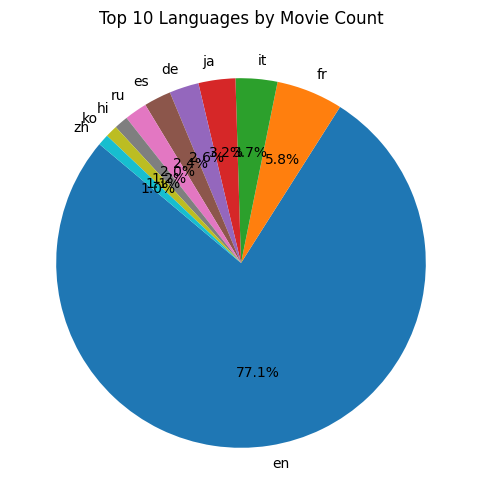

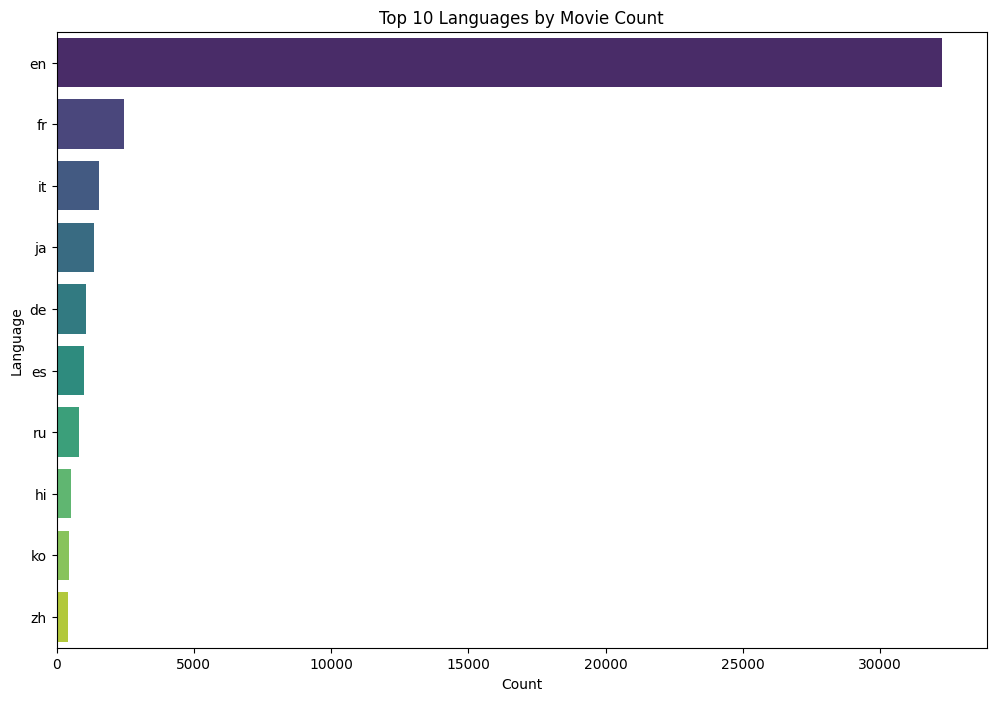

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Top 10 Languages
top_10_languages = dfmovies_original_lang.head(10)

# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(
    top_10_languages['count'],
    labels=top_10_languages['name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 10 Languages by Movie Count')
plt.show()

# Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count',
    y='name',
    data=top_10_languages,
    palette='viridis'
)
plt.title('Top 10 Languages by Movie Count')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


pada gambar diatas terlihat top 10 dari bahasa teratas berdasarkan film, dimulai dari yang teratas adalah bahasa inggris hingga yang terakhir adalah bahasa thionghoa.

MOVIE SPOKEN LANGUAGE

In [ ]:
getlist = getDataList(new_metadata, 'spoken_languages') # Call Function with required Parameter
print("\nLenght of List: ", len(getlist) )

# Create New Dataset for Language
dfmovies_lang = pd.DataFrame(columns=['name', 'count'])
dfmovies_lang['name'] = getlist # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_lang.shape ) # Shape of Dataset

dfmovies_lang = dfmovies_lang.groupby('name').agg({'count': 'size'}).reset_index().sort_values('count', ascending=False)
dfmovies_lang.head(10)


Lenght of List:  52776

Dataset Shape:  (52776, 2)


name  count
14    English  28729
17   Français   4194
12    Deutsch   2624
15    Español   2412
23   Italiano   2366
71        日本語   1758
36    Pусский   1562
72        普通话    790
63     हिन्दी    707
35  Português    591

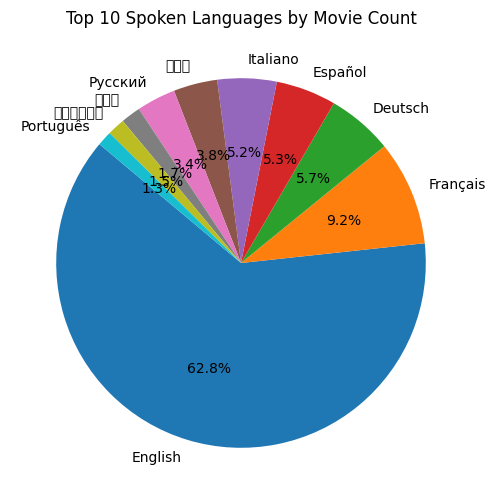

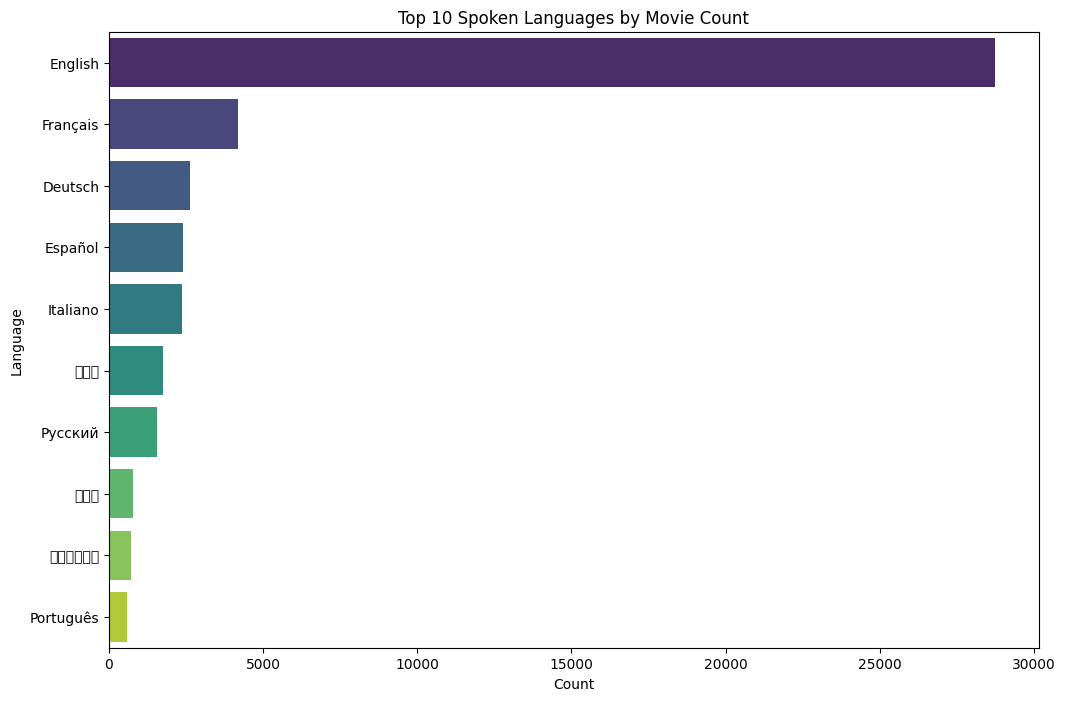

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Top 10 Languages
top_10_languages = dfmovies_lang.head(10)

# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(
    top_10_languages['count'],
    labels=top_10_languages['name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 10 Spoken Languages by Movie Count')
plt.show()

# Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count',
    y='name',
    data=top_10_languages,
    palette='viridis'
)
plt.title('Top 10 Spoken Languages by Movie Count')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


pada gambar diatas terlihat top 10 dari bahasa teratas yang digunakan dalam film. dimulai dari yang teratas adalah bahasa inggris hingga yang terakhir adalah bahasa portugis.

GENRE MOVIE

In [ ]:
getlist_genres = getDataList(new_metadata, 'genres') # Call Function with required Parameter
print("\nLenght of List: ", len(getlist_genres) )

# Create New Dataset for Language
dfmovies_genres = pd.DataFrame(columns=['name', 'count'])
dfmovies_genres['name'] = getlist_genres # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_genres.shape ) # Shape of Dataset

#dfmovies_genres.drop(dfmovies_genres[dfmovies_genres['name'] == 'unknown'].index, inplace=True)
dfmovies_genres = dfmovies_genres.groupby('name').agg({'count': 'size'}).reset_index().sort_values('count', ascending=False)
dfmovies_genres["percent"] = ((dfmovies_genres['count'] / len(getlist_genres)) * 100).round(2)
dfmovies_genres.head(10)


Lenght of List:  91036

Dataset Shape:  (91036, 2)


name  count  percent
6             Drama  20255    22.25
3            Comedy  13181    14.48
17         Thriller   7619     8.37
14          Romance   6733     7.40
0            Action   6592     7.24
11           Horror   4670     5.13
4             Crime   4305     4.73
5       Documentary   3921     4.31
1         Adventure   3494     3.84
15  Science Fiction   3042     3.34

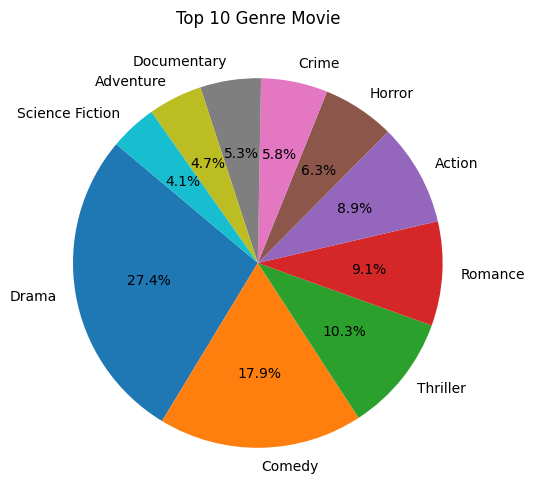

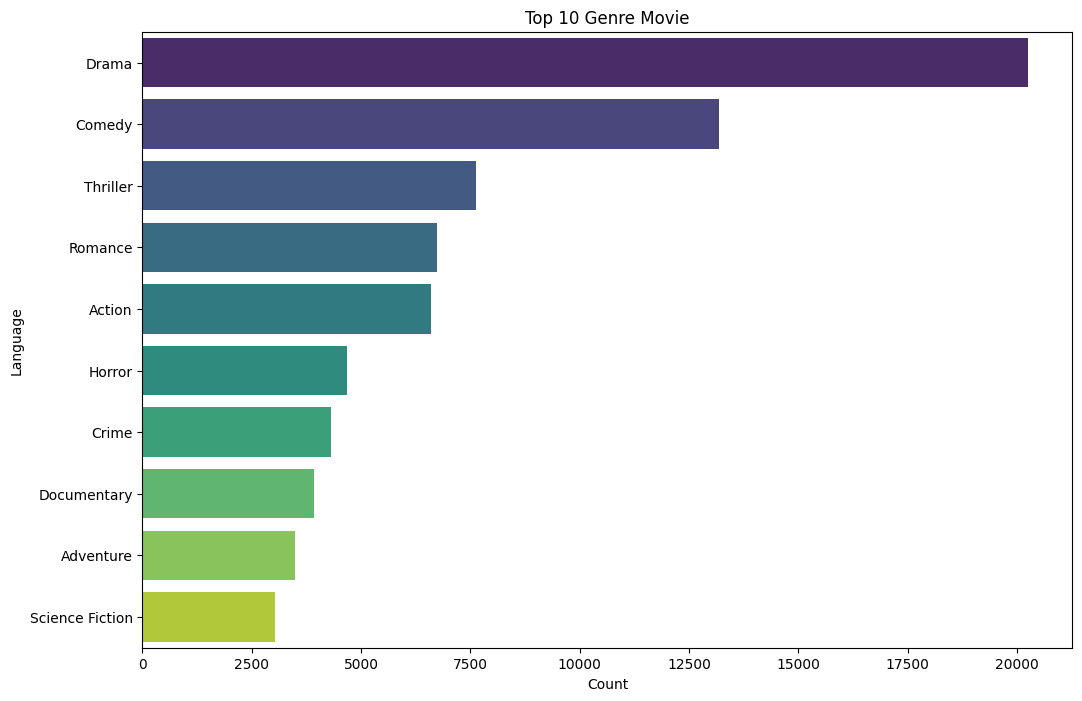

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Top 10 Languages
top_10_languages = dfmovies_genres.head(10)

# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(
    top_10_languages['count'],
    labels=top_10_languages['name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 10 Genre Movie')
plt.show()

# Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count',
    y='name',
    data=top_10_languages,
    palette='viridis'
)
plt.title('Top 10 Genre Movie')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


pada gambar diatas terlihat top 10 dari genre teratas yang terdapat pada film, dimulai dari yang teratas adalah genre drama hingga yang terakhir adalah genre science fiction.

MOVIE PRODUCTION COUNTRIES

In [ ]:
getlist_countries = getDataList(new_metadata, 'production_countries') # Call Function with required Parameter
print("\nLenght of List: ", len(getlist_countries) )

# Create New Dataset for Countries
dfmovies_countries = pd.DataFrame(columns=['name', 'count'])
dfmovies_countries['name'] = getlist_countries # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_countries.shape ) # Shape of Dataset

#dfmovies_genres.drop(dfmovies_genres[dfmovies_genres['name'] == 'unknown'].index, inplace=True)
dfmovies_countries = dfmovies_countries.groupby('name').agg({'count': 'size'}).reset_index().sort_values('count', ascending=False)
dfmovies_countries.head(10)


Lenght of List:  49408

Dataset Shape:  (49408, 2)


name  count
153  United States of America  21147
151            United Kingdom   4091
50                     France   3939
54                    Germany   2254
70                      Italy   2168
27                     Canada   1765
72                      Japan   1648
136                     Spain    964
122                    Russia    911
64                      India    827

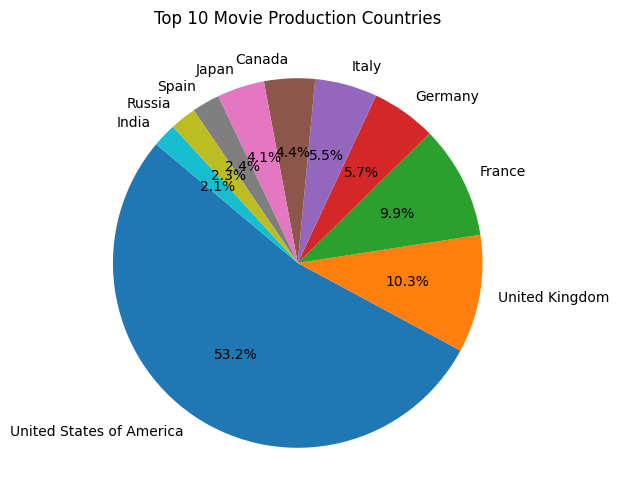

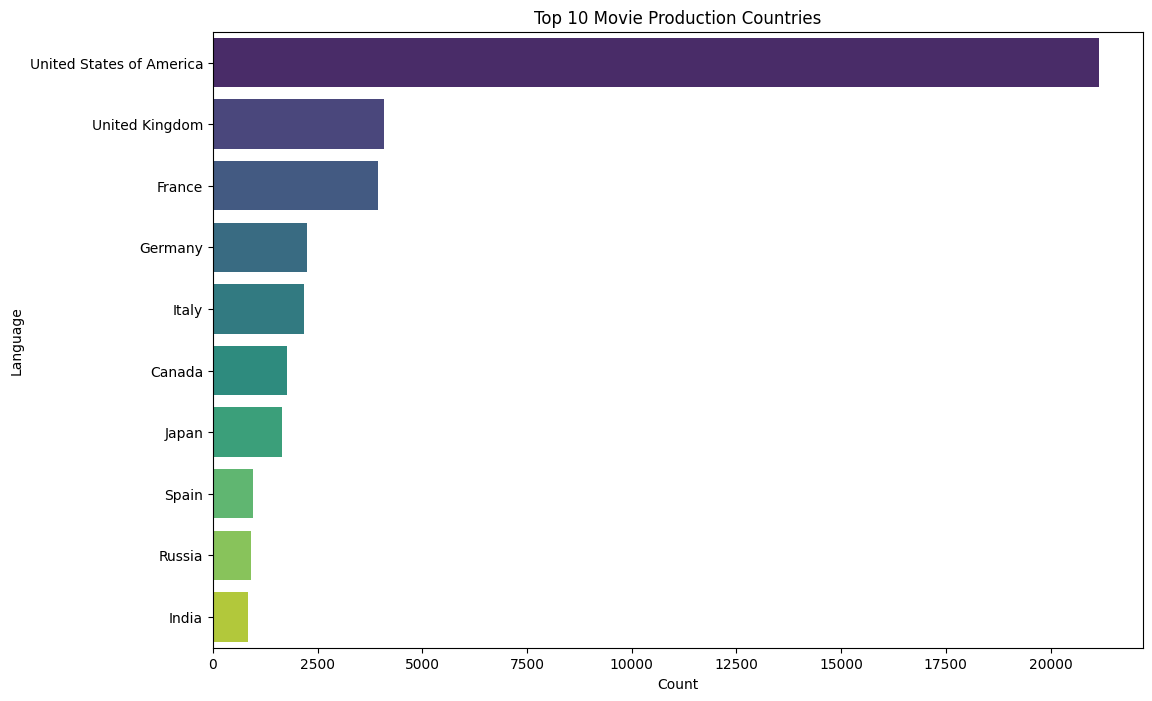

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Top 10 Languages
top_10_languages = dfmovies_countries.head(10)

# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(
    top_10_languages['count'],
    labels=top_10_languages['name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 10 Movie Production Countries')
plt.show()

# Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count',
    y='name',
    data=top_10_languages,
    palette='viridis'
)
plt.title('Top 10 Movie Production Countries')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


pada gambar diatas terlihat top 10 dari negara produksi pada film, dimulai dari yang teratas adalah Negara Amerika hingga yang terakhir adalah Negara India.

MOVIE PRODUCTION COMPANIES

In [ ]:
getlist_companies = getDataList(new_metadata, 'production_companies') # Call Function with required Parameter
print("\nLenght of List: ", len(getlist_companies) )

# Create New Dataset for Countries
dfmovies_companies = pd.DataFrame(columns=['name', 'count'])
dfmovies_companies['name'] = getlist_companies # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_companies.shape ) # Shape of Dataset

#dfmovies_genres.drop(dfmovies_genres[dfmovies_genres['name'] == 'unknown'].index, inplace=True)
dfmovies_companies = dfmovies_companies.groupby('name').agg({'count': 'size'}).reset_index().sort_values('count', ascending=False)
dfmovies_companies.head(10)


Lenght of List:  70530

Dataset Shape:  (70530, 2)


name  count
22482                            Warner Bros.   1250
13557               Metro-Goldwyn-Mayer (MGM)   1076
15709                      Paramount Pictures   1003
21557  Twentieth Century Fox Film Corporation    836
21855                      Universal Pictures    830
4745            Columbia Pictures Corporation    448
3509                                   Canal+    438
4744                        Columbia Pictures    431
16959                      RKO Radio Pictures    290
21796                          United Artists    279

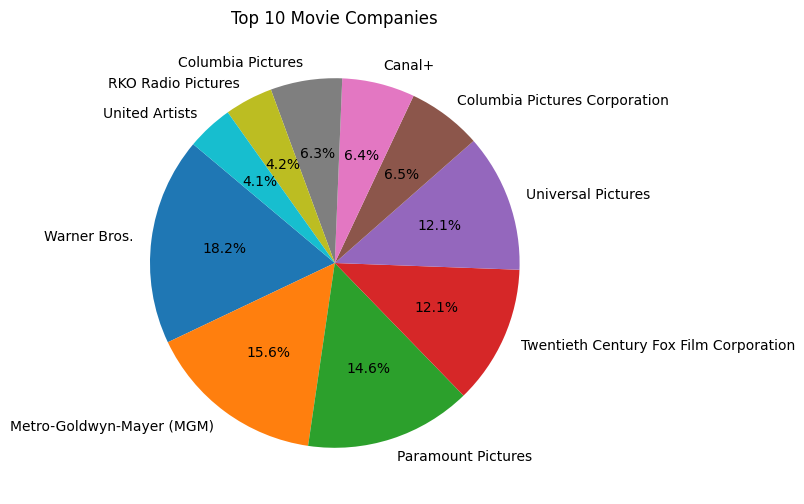

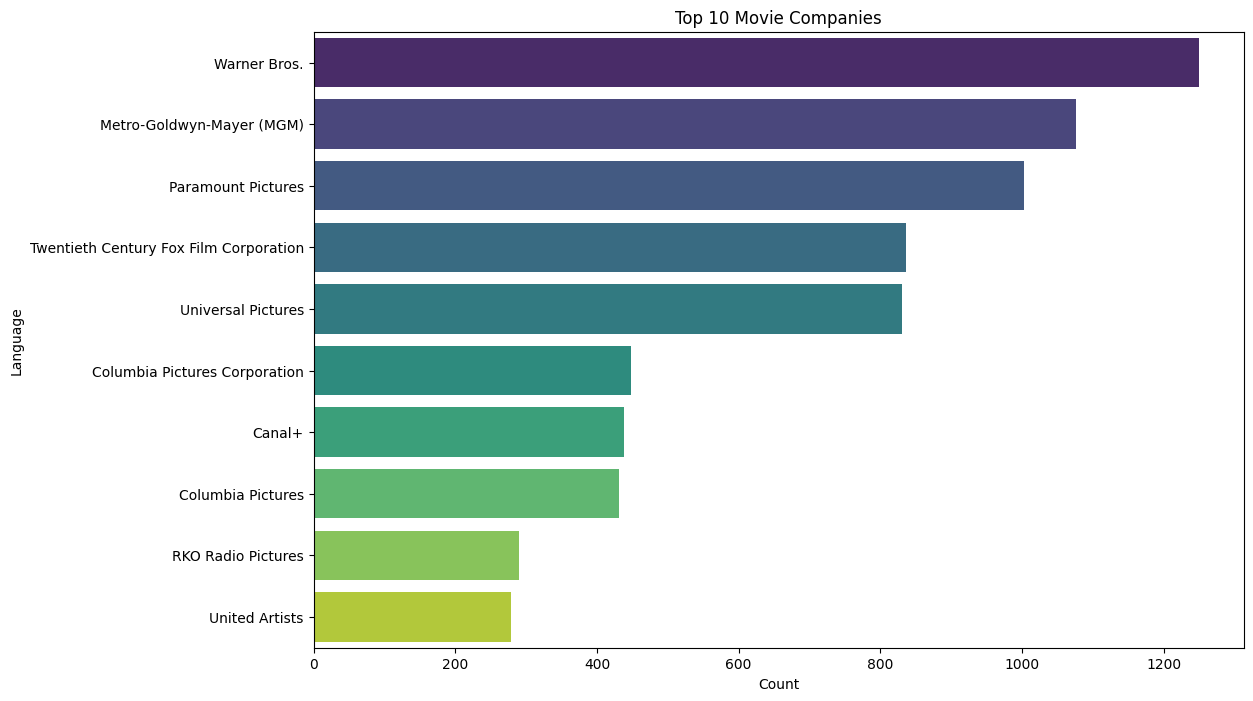

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Top 10 Languages
top_10_languages = dfmovies_companies.head(10)

# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(
    top_10_languages['count'],
    labels=top_10_languages['name'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 10 Movie Companies')
plt.show()

# Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count',
    y='name',
    data=top_10_languages,
    palette='viridis'
)
plt.title('Top 10 Movie Companies')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


pada gambar diatas terlihat top 10 dari perusahaan produksi pada film, dimulai dari yang teratas adalah Warner Bros hingga yang terakhir adalah United Artists.

MOVIE REVENUE

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
dfmetadata_revenue = new_metadata[ new_metadata['revenue'] > 1000000][['revenue', 'year', 'month', 'day_name']]
xdf_revenue_year = dfmetadata_revenue.groupby(['year']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()
xdf_revenue_month = dfmetadata_revenue.groupby(['month']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()
xdf_revenue_dayname = dfmetadata_revenue.groupby(['day_name']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()

In [ ]:
figKill = [go.Bar(y = xdf_revenue_year['revenue'],
                     x = xdf_revenue_year['year'],
                     text = np.round(xdf_revenue_year['revenue']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'black',
                                   line_color = 'green',
                                   line_width = 2))]

layout = go.Layout(title= 'Movies Revenue Earned Per Year',
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Revenue Earned'),
                   width = 1000,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)

In [ ]:
figKill = [go.Bar(y = xdf_revenue_month['revenue'],
                     x = xdf_revenue_month['month'],
                     text = np.round(xdf_revenue_month['revenue']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'black',
                                   line_color = 'green',
                                   line_width = 2))]

layout = go.Layout(title= 'Monthly Revenue Earned by Movies',
                   xaxis = dict(title = 'Months'),
                   yaxis = dict(title = 'Revenue'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)

In [ ]:
figKill = [go.Bar(y = xdf_revenue_dayname['revenue'],
                     x = xdf_revenue_dayname['day_name'],
                     text = np.round(xdf_revenue_dayname['revenue']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'black',
                                   line_color = 'green',
                                   line_width = 2))]

layout = go.Layout(title= 'Revenue as Per Week-Days',
                   xaxis = dict(title = 'Days Name'),
                   yaxis = dict(title = 'Revenue'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)

MOVIES BY POPULAR

In [ ]:
new_metadata[['title', 'popularity', 'year']].sort_values(['popularity', 'year'], ascending=False).head(10)

title  popularity  year
30700                         Minions  547.488298  2015
33356                    Wonder Woman  294.337037  2017
42222            Beauty and the Beast  287.253654  2017
43644                     Baby Driver  228.032744  2017
24455                      Big Hero 6  213.849907  2014
26564                        Deadpool  187.860492  2016
26566  Guardians of the Galaxy Vol. 2  185.330992  2017
14551                          Avatar  185.070892  2009
24351                       John Wick  183.870374  2014
23675                       Gone Girl  154.801009  2014

In [ ]:
# Mengelompokkan berdasarkan 'year' dan memilih film dengan popularitas tertinggi setiap tahun
top_movies_per_year = new_metadata.loc[new_metadata.groupby('year')['popularity'].idxmax()]

# Menampilkan hasil
print(top_movies_per_year[['title', 'popularity', 'year']].sort_values('year'))


                               title  popularity  year
34940               Passage of Venus    0.480371  1874
34937     Sallie Gardner at a Gallop    0.327841  1878
41602                Buffalo Running    0.229221  1883
34933    Man Walking Around a Corner    1.184891  1887
34938  Traffic Crossing Leeds Bridge    1.490420  1888
...                              ...         ...   ...
30700                        Minions  547.488298  2015
26564                       Deadpool  187.860492  2016
33356                   Wonder Woman  294.337037  2017
38130                   Mary Shelley    3.328261  2018
26559                       Avatar 2    6.020055  2020

[135 rows x 3 columns]


In [ ]:
topmovie = new_metadata[['title', 'vote_count', 'year']].sort_values(['vote_count'], ascending=False).head(10)
topmovie

title  vote_count  year
15480                Inception     14075.0  2010
12481          The Dark Knight     12269.0  2008
14551                   Avatar     12114.0  2009
17818             The Avengers     12000.0  2012
26564                 Deadpool     11444.0  2016
22879             Interstellar     11187.0  2014
20051         Django Unchained     10297.0  2012
23753  Guardians of the Galaxy     10014.0  2014
2843                Fight Club      9678.0  1999
18244         The Hunger Games      9634.0  2012

pada tabel diatas terlihat top 10 movie dari kepopuleran berdasarkan vote, dimulai dari yang teratas adalah Inception hingga yang terakhir adalah The Hunger Game.

MOVIE MAKING COST

In [ ]:
dfmovies_cost = new_metadata[(new_metadata['budget'] != 'unknown') &
                                     (new_metadata['revenue'] != 'unknown') ][['title', 'budget', 'revenue', 'year']]

dfmovies_cost['budget'] = dfmovies_cost['budget'].astype(int)
dfmovies_cost['revenue'] =   dfmovies_cost['revenue'].astype(int)

In [ ]:
dfmovies_cost = dfmovies_cost[(dfmovies_cost['budget'] > 1000000 ) &
                              (dfmovies_cost['revenue'] > 1000000 ) ][['title', 'budget', 'revenue', 'year']]
print("Shape: ", dfmovies_cost.shape)
dfmovies_cost

Shape:  (4589, 4)


title      budget      revenue  year
0              Toy Story  30000000.0  373554033.0  1995
1                Jumanji  65000000.0  262797249.0  1995
3      Waiting to Exhale  16000000.0   81452156.0  1995
5                   Heat  60000000.0  187436818.0  1995
8           Sudden Death  35000000.0   64350171.0  1995
...                  ...         ...          ...   ...
45139    The Emoji Movie  50000000.0   66913939.0  2017
45167         Wind River  11000000.0  184770205.0  2017
45250   Sivaji: The Boss  12000000.0   19000000.0  2007
45412        Pro Lyuboff   2000000.0    1268793.0  2010
45422            Antidur   5000000.0    1413000.0  2007

[4589 rows x 4 columns]

In [ ]:
dfmovies_cost.head(10)

title      budget      revenue  year
0                Toy Story  30000000.0  373554033.0  1995
1                  Jumanji  65000000.0  262797249.0  1995
3        Waiting to Exhale  16000000.0   81452156.0  1995
5                     Heat  60000000.0  187436818.0  1995
8             Sudden Death  35000000.0   64350171.0  1995
9                GoldenEye  58000000.0  352194034.0  1995
10  The American President  62000000.0  107879496.0  1995
13                   Nixon  44000000.0   13681765.0  1995
14        Cutthroat Island  98000000.0   10017322.0  1995
15                  Casino  52000000.0  116112375.0  1995

In [ ]:
dfmovies_cost_year = dfmovies_cost.groupby(['year']).sum()
dfmovies_cost_year

title        budget  \
year                                                                    
1924                                The Thief of Bagdad  1.135654e+06   
1925                      Ben-Hur: A Tale of the Christ  3.900000e+06   
1930                                      Hell's Angels  3.950000e+06   
1933                           CavalcadeQueen Christina  2.294280e+06   
1935                  Mutiny on the BountyAnna Karenina  3.102000e+06   
...                                                 ...           ...   
2013  Bullet to the HeadWarm BodiesTexas Chainsaw 3D...  8.877227e+09   
2014  Paranormal Activity: The Marked OnesYves Saint...  7.729883e+09   
2015  Mission: Impossible - Rogue NationJupiter Asce...  7.636558e+09   
2016  Ben-HurWarcraftDeadpoolCaptain America: Civil ...  9.417038e+09   
2017  Pirates of the Caribbean: Dead Men Tell No Tal...  4.231012e+09   

           revenue  
year                
1924  1.213880e+06  
1925  9.000000e+06  
1930  8.000000e+06  
1933  1.024000e+07  
1935  5.899000e+06  
...            ...  
2013  2.568578e+10  
2014  2.578087e+10  
2015  2.784294e+10  
2016  2.960865e+10  
2017  1.490615e+10  

[86 rows x 3 columns]

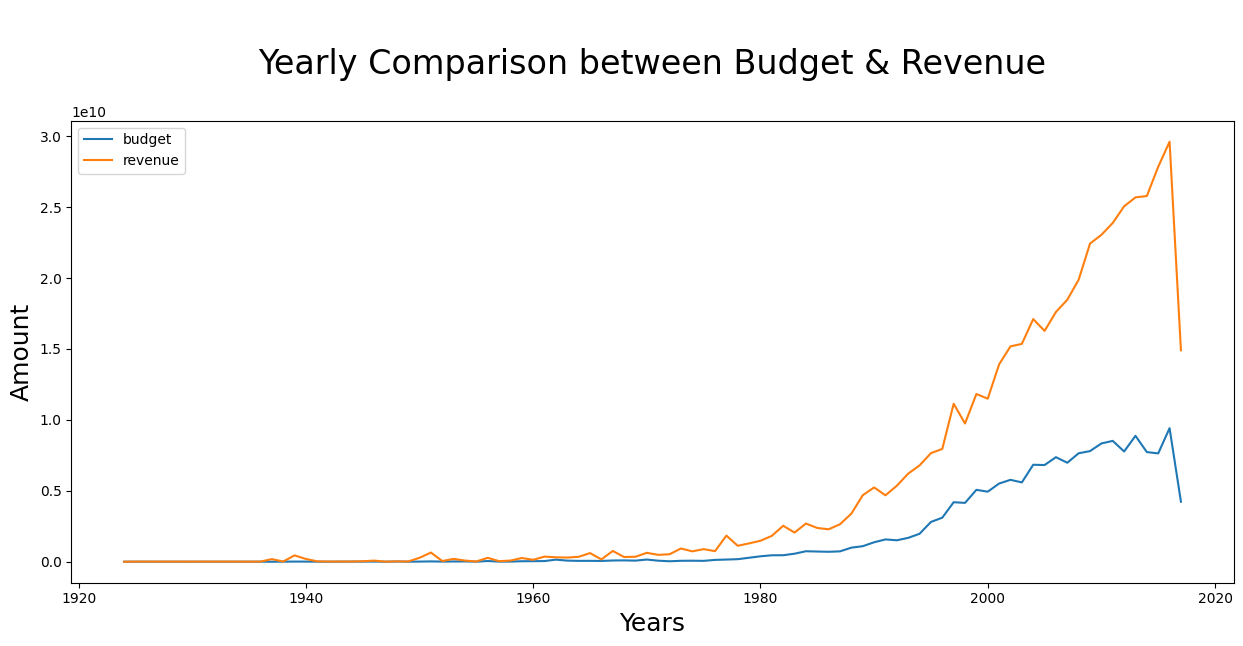

In [ ]:
dfmovies_cost_year.plot.line(figsize=(15,6))
plt.xlabel('Years', fontsize=18)
plt.ylabel('Amount', fontsize=18)
plt.title('\nYearly Comparison between Budget & Revenue\n', fontsize=24)
plt.show()

grafik diatas membandingkan pendapatan dan budget dalam movie setiap tahunnya

In [ ]:
print("Top 10 Budget Movies")
print("="*25)
dfmovies_cost.sort_values(['budget'], ascending=False).head(10)

Top 10 Budget Movies


title       budget       revenue  \
17124  Pirates of the Caribbean: On Stranger Tides  380000000.0  1.045714e+09   
11827     Pirates of the Caribbean: At World's End  300000000.0  9.610000e+08   
26558                      Avengers: Age of Ultron  280000000.0  1.405404e+09   
11067                             Superman Returns  270000000.0  3.910812e+08   
44842                Transformers: The Last Knight  260000000.0  6.049421e+08   
16130                                      Tangled  260000000.0  5.917949e+08   
18685                                  John Carter  260000000.0  2.841391e+08   
11780                                 Spider-Man 3  258000000.0  8.908716e+08   
21175                              The Lone Ranger  255000000.0  8.928991e+07   
26567                   Captain America: Civil War  250000000.0  1.153304e+09   

       year  
17124  2011  
11827  2007  
26558  2015  
11067  2006  
44842  2017  
16130  2010  
18685  2012  
11780  2007  
21175  2013  
26567  2016

dapat dilihat pada tabel diatas movie dengan budget terbesar

In [ ]:
print("Top 10 Revenue Earned Movies")
print("="*35)
dfmovies_cost.sort_values(['revenue'], ascending=False).head(10)

Top 10 Revenue Earned Movies


title       budget  \
14551                                        Avatar  237000000.0   
26555                  Star Wars: The Force Awakens  245000000.0   
1639                                        Titanic  200000000.0   
17818                                  The Avengers  220000000.0   
25084                                Jurassic World  150000000.0   
28830                                     Furious 7  190000000.0   
26558                       Avengers: Age of Ultron  280000000.0   
17437  Harry Potter and the Deathly Hallows: Part 2  125000000.0   
22110                                        Frozen  150000000.0   
42222                          Beauty and the Beast  160000000.0   

            revenue  year  
14551  2.787965e+09  2009  
26555  2.068224e+09  2015  
1639   1.845034e+09  1997  
17818  1.519558e+09  2012  
25084  1.513529e+09  2015  
28830  1.506249e+09  2015  
26558  1.405404e+09  2015  
17437  1.342000e+09  2011  
22110  1.274219e+09  2013  
42222  1.262886e+09  2017

dapat dilihat pada tabel diatas movie dengan pendapatan terbesar

In [ ]:
metadata['tagline'] = metadata['tagline'].astype(str)
metadata['overview'] = metadata['overview'].astype(str)

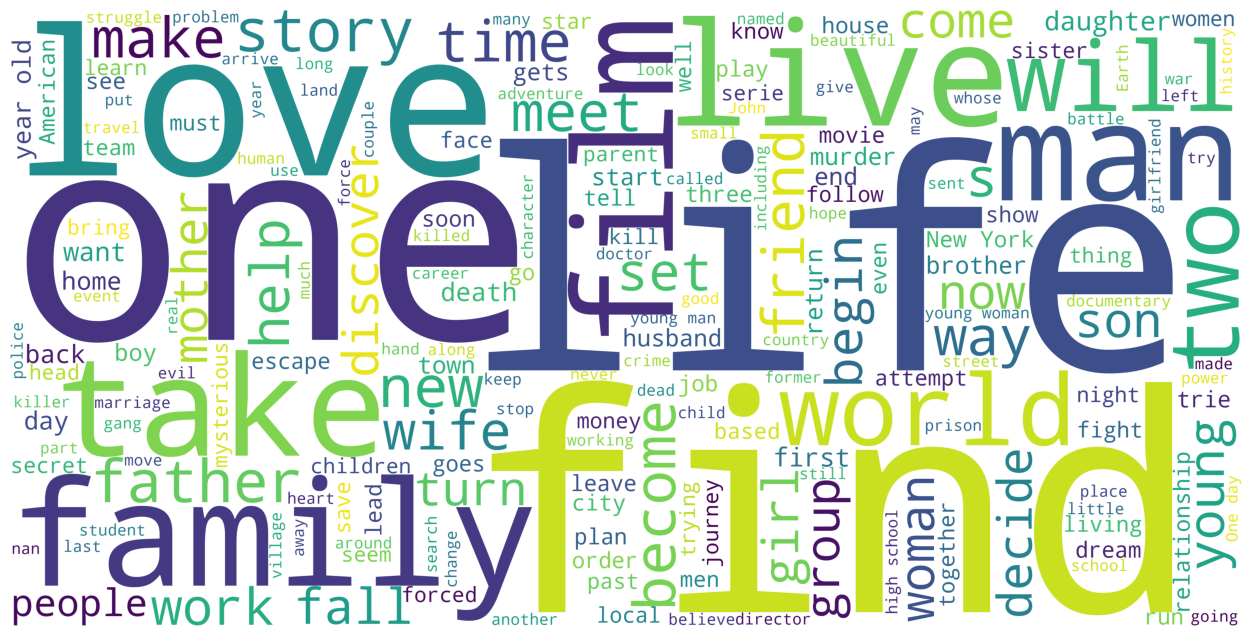

In [ ]:
# Overview
xtitle = ' '.join(metadata['overview'])
xtitleWordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(xtitle)
plt.figure(figsize=(16,8))
plt.imshow(xtitleWordcloud)
plt.axis('off')
plt.show()

pada gambar diatas terlihat word cloud dari overview pada dataset, dapat dilihat terdapat kata-kata yang sering muncul dan memiliki ukuran lebih besar dari yang lainnya.

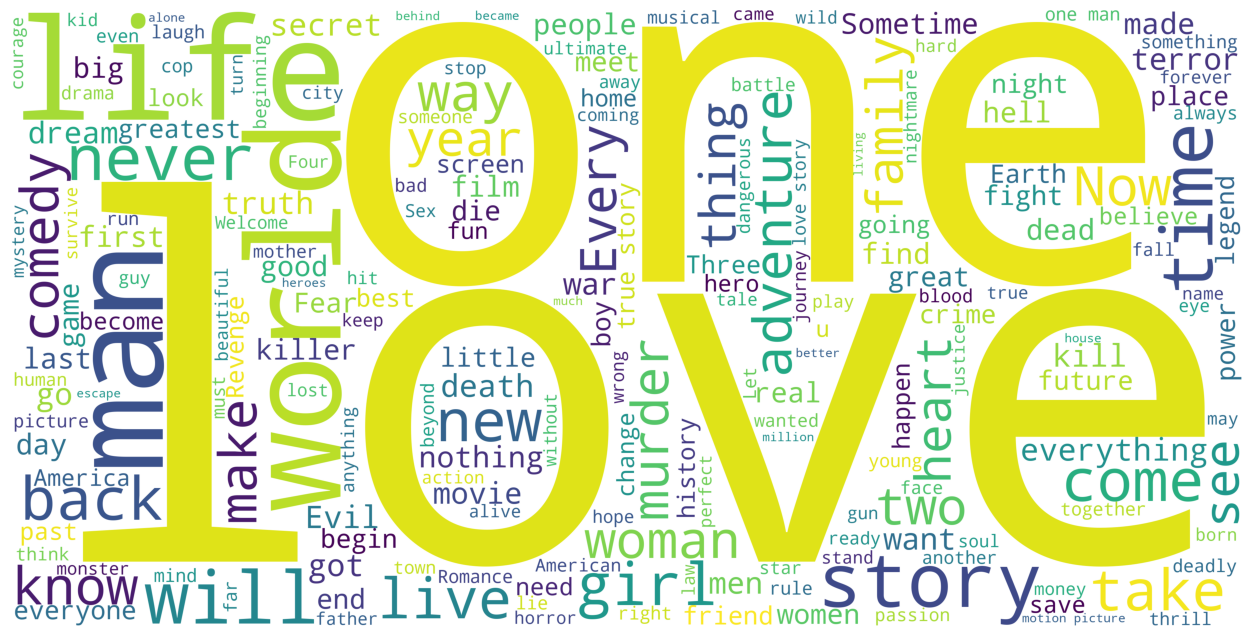

In [ ]:
# Tagline
metadata_tagline = metadata[metadata['tagline'] != 'nan']
xtitle = ' '.join(metadata_tagline['tagline'])
xtitleWordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(xtitle)
plt.figure(figsize=(16,8))
plt.imshow(xtitleWordcloud)
plt.axis('off')
plt.show()

pada gambar diatas terlihat word cloud dari tagline pada dataset, dapat dilihat terdapat kata-kata yang sering muncul dan memiliki ukuran lebih besar dari yang lainnya.

BUDGET AND REVENUE MOVIE

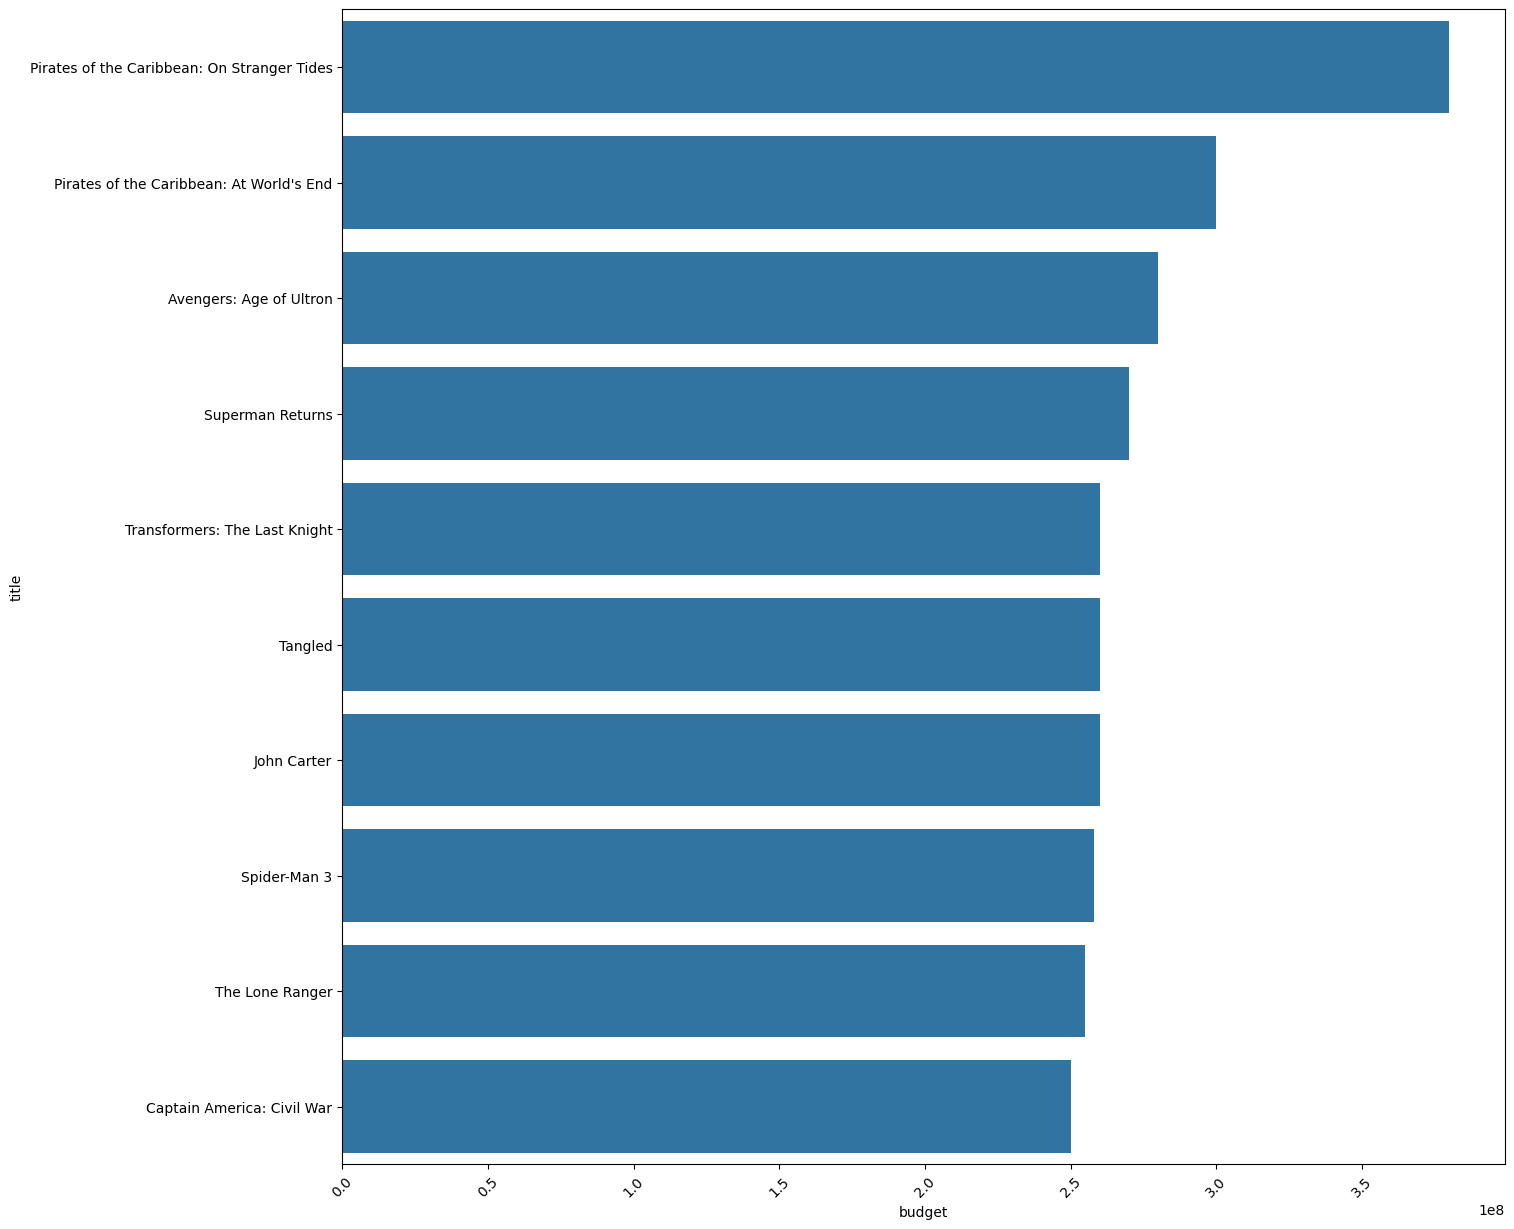

In [ ]:
import seaborn as sns
dfmoviesby_budget = dfmovies_cost.sort_values('budget', ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(y='title', x='budget', data=dfmoviesby_budget.head(10) )
plt.xticks(rotation=45)
plt.show()

pada gambar diatas terlihat top 10 movie dengan budget terbesar yang diantaranya yang paling atas terdapat Pirates of The Caribian dan yang paling bawah adalah Captain Amerika: Civil War.

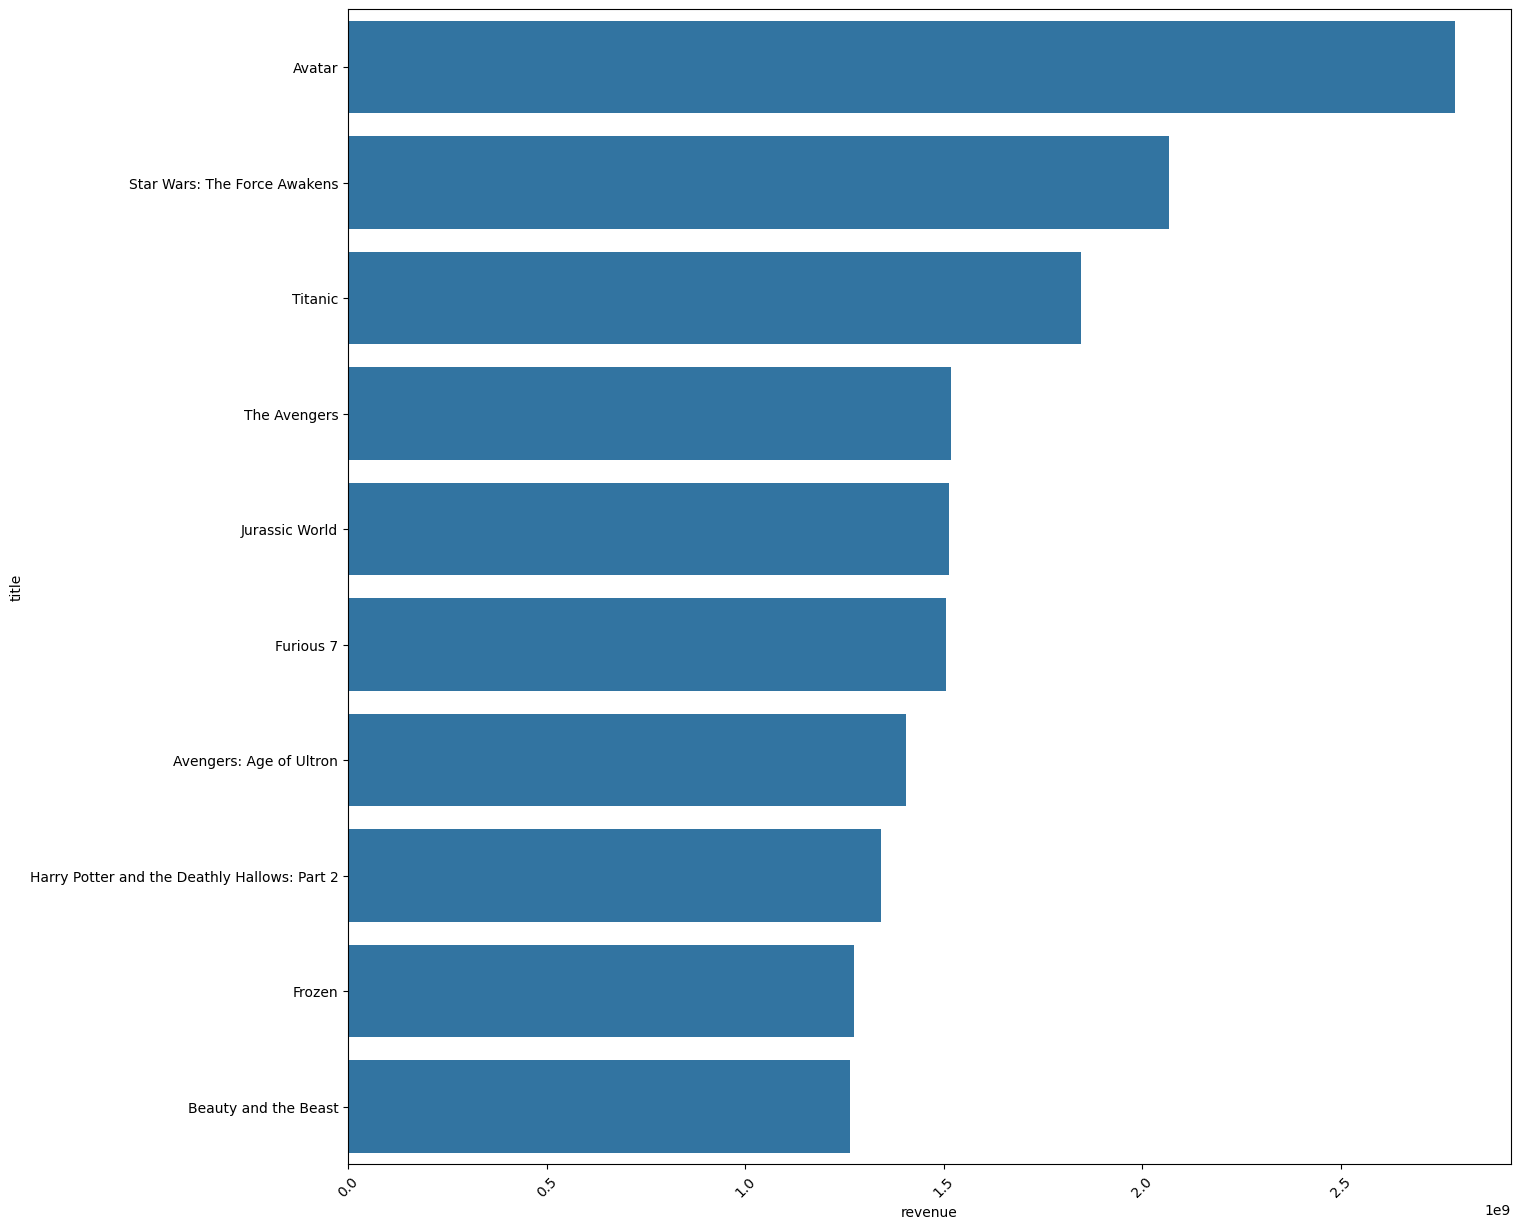

In [ ]:
dfmoviesby_revenue = dfmovies_cost.sort_values('revenue', ascending=False)
dfmoviesby_revenue.head(3)

plt.figure(figsize=(15,15))
sns.barplot(y='title', x='revenue', data=dfmoviesby_revenue.head(10) )
plt.xticks(rotation=45)
plt.show()

pada gambar diatas terlihat top 10 movie dengan pendapatan terbesar yang diantaranya yang paling atas terdapat Avatar dan yang paling bawah adalah Beauty and the Beast.

# PRE-PROCESSING

pada tahapan pre-processing ini akan dilakukan pre-processing dalam masing-masing kolom yang akan digunakan pada proses model

## MOVIE METADATA

bagian ini akan melakukan pre-processing pada metadata untuk mempersiapkan dalam tahap analisis nantinya

In [ ]:
metadata["id"] = metadata["id"].apply(pd.to_numeric, errors = "ignore")
keyword["id"] = keyword["id"].apply(int)
credit["id"] = credit["id"].apply(int)

merubah tipe data pada kolom yang terdapat pada metadata

In [ ]:
movie_data = metadata.merge(keyword, on = "id").merge(credit, on = "id")
movie_data

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
46623  False                                                NaN         0   
46624  False                                                NaN         0   
46625  False                                                NaN         0   
46626  False                                                NaN         0   
46627  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
46623  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
46624                      [{'id': 18, 'name': 'Drama'}]   
46625  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
46626                                                 []   
46627                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
46623  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
46624                                   NaN  111109  tt2028550   
46625                                   NaN   67758  tt0303758   
46626                                   NaN  227506  tt0008536   
46627                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
46623                fa                      رگ خواب   
46624                tl          Siglo ng Pagluluwal   
46625                en                     Betrayal   
46626                en          Satana likuyushchiy   
46627                en                     Queerama   

                                                overview  ...  \
0      Led by Woody, Andy's toys live happily in his ...  ...   
1      When siblings Judy and Peter discover an encha...  ...   
2      A family wedding reignites the ancient feud be...  ...   
3      Cheated on, mistreated and stepped on, the wom...  ...   
4      Just when George Banks has recovered from his ...  ...   
...                                                  ...  ...   
46623        Rising and falling between a man and woman.  ...   
46624  An artist struggles to finish his work while a...  ...   
46625  When one of her hits goes wrong, a professiona...  ...   
46626  In a small town live two brothers, one a minis...  ...   
46627  50 years after decriminalisation of homosexual...  ...   

                                        spoken_languages    status  \
0               [{'iso_639_1': 'en', 'name':

In [ ]:
movie_data.isnull().sum()

adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
keywords                     0
cast                         0
crew                         0
dtype: int64

In [ ]:
movie_data.adult.value_counts()

adult
False    46619
True         9
Name: count, dtype: int64

In [ ]:
movie_data[movie_data.duplicated(subset = ["title", "id"])].shape[0]

1196

In [ ]:
movie_data[movie_data.duplicated(subset = ["title", "id"], keep = False)].sort_values("id").head(5)

adult belongs_to_collection budget  \
37082  False                   NaN      0   
37083  False                   NaN      0   
36536  False                   NaN      0   
36537  False                   NaN      0   
26038  False                   NaN      0   

                                                  genres homepage    id  \
37082                      [{'id': 18, 'name': 'Drama'}]      NaN  1998   
37083                      [{'id': 18, 'name': 'Drama'}]      NaN  1998   
36536  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...      NaN  3025   
36537  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...      NaN  3025   
26038  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...      NaN  3057   

         imdb_id original_language               original_title  \
37082  tt0384177                en                    Holy Lola   
37083  tt0384177                en                    Holy Lola   
36536  tt0054416                en  The Two Faces of Dr. Jekyll   
36537  tt0054416                en  The Two Faces of Dr. Jekyll   
26038  tt0368730                en                 Frankenstein   

                                                overview  ...  \
37082  The story of a young couple, Pierre and Gerald...  ...   
37083  The story of a young couple, Pierre and Gerald...  ...   
36536  After a series of scientific experiments direc...  ...   
36537  After a series of scientific experiments direc...  ...   
26038  Frankenstein is a 2004 U.S. television miniser...  ...   

                                        spoken_languages    status  \
37082  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
37083  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
36536           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
36537           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
26038          [{'iso_639_1': 'fr', 'name': 'Français'}]  Released   

                                tagline                        title  video  \
37082                               NaN                    Holy Lola  False   
37083                               NaN                    Holy Lola  False   
36536  LIKE NOTHING YOU HAVE EVER SEEN!  The Two Faces of Dr. Jekyll  False   
36537  LIKE NOTHING YOU HAVE EVER SEEN!  The Two Faces of Dr. Jekyll  False   
26038                               NaN                 Frankenstein  False   

       vote_average  vote_count  \
37082           5.1         6.0   
37083           5.1         6.0   
36536           5.7        15.0   
36537           5.7        15.0   
26038           6.0        14.0   

                                                keywords  \
37082  [{'id': 417, 'name': 'corruption'}, {'id': 612...   
37083  [{'id': 417, 'name': 'corruption'}, {'id': 612...   
36536  [{'id': 212, 'name': 'london england'}, {'id':...   
36537  [{'id': 212, 'name': 'london england'}, {'id':...   
26038  [{'id': 1299, 'name': 'monster'}, {'id': 6737,...   

                                                    cast  \
37082  [{'cast_id': 8, 'character': 'Géraldine Ceyssa...   
37083  [{'cast_id': 8, 'character': 'Géraldine Ceyssa...   
36536  [{'cast_id': 13, 'character': 'Dr. Jekyll/Mr.H...   
36537  [{'cast_id': 13, 'character': 'Dr. Jekyll/Mr.H...   
26038  [{'cast_id': 12, 'character': 'The Creature', ...   

                                                    crew  
37082  [{'credit_id': '52fe432ac3a36847f803f547', 'de...  
37083  [{'credit_id': '52fe432ac3a36847f803f547', 'de...  
36536  [{'credit_id': '52fe437dc3a36847f80581bf', 'de...  
36537  [{'credit_id': '52fe437dc3a36847f80581bf', 'de...  
26038  [{'credit_id': '52fe4380c3a36847f80590dd', 'de...  

[5 rows x 27 columns]

In [ ]:
movie_data.isnull().sum()

adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
keywords                     0
cast                         0
crew                         0
dtype: int64

In [ ]:
movie_data.drop_duplicates(subset = ["title", "id"], inplace = True)

menghapus duplikat yang ada pada kolom title dan id

In [ ]:
movie_data.isnull().sum()

adult                        0
belongs_to_collection    40944
budget                       0
genres                       0
homepage                 37658
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25031
title                        3
video                        3
vote_average                 3
vote_count                   3
keywords                     0
cast                         0
crew                         0
dtype: int64

In [ ]:
movie_data = movie_data[movie_data.title.notnull()]
movie_data.shape

(45429, 27)

In [ ]:
movie_data = movie_data[movie_data.vote_count > 25]
movie_data.shape

(13486, 27)

memfilter movie data dengan vote count lebih dari 25

In [ ]:
columns = ["title", "genres", "original_language", "overview", "popularity",
           "release_date", "imdb_id", "runtime", "tagline",
           "vote_average", "vote_count", "keywords", "cast", "crew", "id"]

movie_data = movie_data[columns]

In [ ]:
movie_data = movie_data[movie_data["release_date"].notnull()]
movie_data = movie_data[movie_data["runtime"].notnull()]

In [ ]:
movie_data["release_date"] = pd.to_datetime(movie_data['release_date'])
movie_data["release_year"] = movie_data["release_date"].dt.year

movie_data.drop("release_date", axis = 1, inplace = True)

In [ ]:
movie_data["vote_average_bins"] = pd.cut(movie_data["vote_average"].astype(float), 10, labels = range(1, 11))
movie_data["release_year_bins"] = pd.qcut(movie_data["release_year"].astype(float), q = 10, labels = range(1, 11))

binned_features = ["vote_average_bins", "release_year_bins"]

merubah tipe data yang terdapat pada kolom pada dataset metadata

In [ ]:
for col in binned_features:
    scaler = MinMaxScaler()

    movie_data[col] = movie_data[col].astype(int)
    movie_data[col] = scaler.fit_transform(movie_data[col].values.reshape(-1, 1))

feature minmaxscaler digunakan untuk menormalkan kolom dalam dataset yang termasuk dalam daftar binned_features menggunakan MinMaxScaler. Dengan cara ini, nilai-nilai dalam kolom tersebut diubah ke dalam rentang 0 hingga 1, yang membantu memastikan bahwa semua fitur memiliki skala yang sama. Hal ini penting untuk mencegah fitur dengan rentang nilai lebih besar mendominasi model dan untuk meningkatkan efisiensi serta stabilitas pelatihan model, terutama untuk algoritma yang sensitif terhadap skala data seperti sistem rekomendasi ini.

In [ ]:
movie_data.set_index("title", inplace = True)

In [ ]:
movie_data.head()

genres  \
title                                                                            
Toy Story                    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
Jumanji                      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
Grumpier Old Men             [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
Waiting to Exhale            [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
Father of the Bride Part II                     [{'id': 35, 'name': 'Comedy'}]   

                            original_language  \
title                                           
Toy Story                                  en   
Jumanji                                    en   
Grumpier Old Men                           en   
Waiting to Exhale                          en   
Father of the Bride Part II                en   

                                                                      overview  \
title                                                                            
Toy Story                    Led by Woody, Andy's toys live happily in his ...   
Jumanji                      When siblings Judy and Peter discover an encha...   
Grumpier Old Men             A family wedding reignites the ancient feud be...   
Waiting to Exhale            Cheated on, mistreated and stepped on, the wom...   
Father of the Bride Part II  Just when George Banks has recovered from his ...   

                            popularity    imdb_id  runtime  \
title                                                        
Toy Story                    21.946943  tt0114709     81.0   
Jumanji                      17.015539  tt0113497    104.0   
Grumpier Old Men               11.7129  tt0113228    101.0   
Waiting to Exhale             3.859495  tt0114885    127.0   
Father of the Bride Part II   8.387519  tt0113041    106.0   

                                                                       tagline  \
title                                                                            
Toy Story                                                                  NaN   
Jumanji                              Roll the dice and unleash the excitement!   
Grumpier Old Men             Still Yelling. Still Fighting. Still Ready for...   
Waiting to Exhale            Friends are the people who let you be yourself...   
Father of the Bride Part II  Just When His World Is Back To Normal... He's ...   

                             vote_average  vote_count  \
title                                                   
Toy Story                             7.7      5415.0   
Jumanji                               6.9      2413.0   
Grumpier Old Men                      6.5        92.0   
Waiting to Exhale                     6.1        34.0   
Father of the Bride Part II           5.7       173.0   

                                                                      keywords  \
title                                                                            
Toy Story                    [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...   
Jumanji                      [{'id': 10090, 'name': 'board game'}, {'id': 1...   
Grumpier Old Men             [{'id': 1495, 'name': 'fishing'}, {'id': 12392...   
Waiting to Exhale            [{'id': 818, 'name': 'based on novel'}, {'id':...   
Father of the Bride Part II  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...   

                                                                          cast  \
title                                                                            
Toy Story                    [{'cast_id': 14, 'character': 'Woody (voice)',...   
Jumanji                      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
Grumpier Old Men             [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
Waiting to Exhale            [{'cast_id': 1, 'character': "Savannah 'Vannah...   
Father of the Bride Part II  [{'cast_id': 1, 'character': 'George Banks', '...   

                  

## MOVIE LANGUAGE

bagian ini akan melakukan pre-processing pada movie language untuk mempersiapkan dalam tahap analisis nantinya

In [ ]:
languages = pd.get_dummies(movie_data["original_language"])

In [ ]:
languages

ab     af     ar     bn     bs     ca     cn  \
title                                                                           
Toy Story                     False  False  False  False  False  False  False   
Jumanji                       False  False  False  False  False  False  False   
Grumpier Old Men              False  False  False  False  False  False  False   
Waiting to Exhale             False  False  False  False  False  False  False   
Father of the Bride Part II   False  False  False  False  False  False  False   
...                             ...    ...    ...    ...    ...    ...    ...   
The Incredible Jessica James  False  False  False  False  False  False  False   
In a Heartbeat                False  False  False  False  False  False  False   
Cadet Kelly                   False  False  False  False  False  False  False   
The Man with the Rubber Head  False  False  False  False  False  False  False   
Robin Hood                    False  False  False  False  False  False  False   

                                 cs     da     de  ...     sv     ta     te  \
title                                              ...                        
Toy Story                     False  False  False  ...  False  False  False   
Jumanji                       False  False  False  ...  False  False  False   
Grumpier Old Men              False  False  False  ...  False  False  False   
Waiting to Exhale             False  False  False  ...  False  False  False   
Father of the Bride Part II   False  False  False  ...  False  False  False   
...                             ...    ...    ...  ...    ...    ...    ...   
The Incredible Jessica James  False  False  False  ...  False  False  False   
In a Heartbeat                False  False  False  ...  False  False  False   
Cadet Kelly                   False  False  False  ...  False  False  False   
The Man with the Rubber Head  False  False  False  ...  False  False  False   
Robin Hood                    False  False  False  ...  False  False  False   

                                 th     tl     tr     uk     vi     xx     zh  
title                                                                          
Toy Story                     False  False  False  False  False  False  False  
Jumanji                       False  False  False  False  False  False  False  
Grumpier Old Men              False  False  False  False  False  False  False  
Waiting to Exhale             False  False  False  False  False  False  False  
Father of the Bride Part II   False  False  False  False  False  False  False  
...                             ...    ...    ...    ...    ...    ...    ...  
The Incredible Jessica James  False  False  False  False  False  False  False  
In a Heartbeat                False  False  False  False  False  False  False  
Cadet Kelly                   False  False  False  False  False  False  False  
The Man with the Rubber Head  False  False  False  False  False  False  False  
Robin Hood                    False  False  False  False  False  False  False  

[13478 rows x 49 columns]

## MOVIE GENRE

bagian ini akan melakukan pre-processing pada movie genre untuk mempersiapkan dalam tahap analisis nantinya

In [ ]:
movie_data['genres'] = movie_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else "")
movie_data["genres"] = movie_data["genres"].astype(str)

In [ ]:
cv = CountVectorizer(lowercase = False)

genres = cv.fit_transform(movie_data["genres"])
genres_df = pd.DataFrame(genres.todense(), columns = cv.get_feature_names_out())

genres_df.set_index(movie_data.index, inplace = True)

In [ ]:
genres_df

Action  Adventure  Animation  Comedy  Crime  \
title                                                                       
Toy Story                          0          0          1       1      0   
Jumanji                            0          1          0       0      0   
Grumpier Old Men                   0          0          0       1      0   
Waiting to Exhale                  0          0          0       1      0   
Father of the Bride Part II        0          0          0       1      0   
...                              ...        ...        ...     ...    ...   
The Incredible Jessica James       0          0          0       1      0   
In a Heartbeat                     0          0          1       1      0   
Cadet Kelly                        0          0          0       1      0   
The Man with the Rubber Head       0          0          0       1      0   
Robin Hood                         1          0          0       0      0   

                              Documentary  Drama  Family  Fantasy  Fiction  \
title                                                                        
Toy Story                               0      0       1        0        0   
Jumanji                                 0      0       1        1        0   
Grumpier Old Men                        0      0       0        0        0   
Waiting to Exhale                       0      1       0        0        0   
Father of the Bride Part II             0      0       0        0        0   
...                                   ...    ...     ...      ...      ...   
The Incredible Jessica James            0      0       0        0        0   
In a Heartbeat                          0      0       1        0        0   
Cadet Kelly                             0      0       0        0        0   
The Man with the Rubber Head            0      0       0        1        1   
Robin Hood                              0      1       0        0        0   

                              ...  Horror  Movie  Music  Mystery  Romance  \
title                         ...                                           
Toy Story                     ...       0      0      0        0        0   
Jumanji                       ...       0      0      0        0        0   
Grumpier Old Men              ...       0      0      0        0        1   
Waiting to Exhale             ...       0      0      0        0        1   
Father of the Bride Part II   ...       0      0      0        0        0   
...                           ...     ...    ...    ...      ...      ...   
The Incredible Jessica James  ...       0      0      0        0        1   
In a Heartbeat                ...       0      0      0        0        1   
Cadet Kelly                   ...       0      0      0        0        0   
The Man with the Rubber Head  ...       0      0      0        0        0   
Robin Hood                    ...       0      0      0        0        1   

                              Science  TV  Thriller  War  Western  
title                                                              
Toy Story                           0   0         0    0        0  
Jumanji                             0   0         0    0        0  
Grumpier Old Men                    0   0         0    0        0  
Waiting to Exhale                   0   0         0    0        0  
Father of the Bride Part II         0   0         0    0        0  
...                               ...  ..       ...  ...      ...  
The Incredible Jessica James        0   0         0    0        0  
In a Heartbeat                      0   0         0    0        0  
Cadet Kelly                         0   0         0    0        0  
The Man with the Rubber Head        1   0         0    0        0  
Robin Hood                          0   0         0    0        0  

[13478 rows x 22 columns]

## MOVIE OVERVIEW, TAGLINE, KEYWORD

bagian ini akan melakukan pre-processing pada overview, tagline dan keyword untuk mempersiapkan dalam tahap analisis nantinya

In [ ]:
stop_words = stopwords.words('english')

def tokenizer(text):

    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if len(token) > 1]
    stems = []

    for token in tokens:
        stemmer = PorterStemmer()
        stems.append(stemmer.stem(token))
    return stems

Fungsi tokenizer digunakan untuk memproses teks dan menghasilkan daftar kata dasar (stemming) yang sudah dibersihkan dari kata-kata yang tidak relevan. Fungsi ini pertama-tama membagi teks menjadi token-token menggunakan nltk.word_tokenize, kemudian menghapus kata-kata yang termasuk dalam daftar stop words bahasa Inggris, serta hanya mempertahankan token yang berupa alfabet dan memiliki panjang lebih dari satu karakter. Selanjutnya, setiap token yang tersisa diproses dengan Porter Stemmer untuk mengubahnya menjadi bentuk dasar (stem), yang berguna dalam analisis teks dan pemodelan machine learning agar model dapat fokus pada bentuk dasar kata dan bukan variasi kata yang berbeda.

In [ ]:
movie_data['keywords'] = movie_data['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else "")
movie_data["keywords"] = movie_data["keywords"].astype(str)

In [ ]:
movie_data["tagline"].fillna("", inplace = True)
movie_data["overview"].fillna("", inplace = True)
movie_data["keywords"].fillna("", inplace = True)

movie_data["text"] = movie_data["overview"] + movie_data["tagline"] + movie_data["keywords"]

tfidf = TfidfVectorizer(min_df = 5, max_df = 0.8, tokenizer = tokenizer, ngram_range = (1, 2),
                        binary = True, use_idf = False, norm = None)

tfidf_matrix = tfidf.fit_transform(movie_data["text"])
tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns = tfidf.get_feature_names_out())

tfidf_df.set_index(movie_data.index, inplace = True)

TF-IDF digunakan untuk memproses teks yang terdapat dalam kolom overview, tagline, dan keywords pada dataset movie_data dan menggabungkannya menjadi satu kolom baru bernama text. Setelah itu, TF-IDF Vectorizer diterapkan untuk mengubah teks menjadi representasi numerik menggunakan teknik Term Frequency-Inverse Document Frequency (TF-IDF), yang menilai pentingnya kata dalam setiap dokumen. Konfigurasi TfidfVectorizer seperti min_df, max_df, dan ngram_range diatur untuk memilih fitur yang relevan, dengan tokenisasi yang disesuaikan menggunakan fungsi tokenizer yang telah didefinisikan sebelumnya. Hasilnya adalah matriks fitur dari teks yang diubah menjadi DataFrame tfidf_df, yang berfungsi untuk merepresentasikan teks dalam format yang bisa digunakan untuk analisis lebih lanjut atau model pembelajaran mesin.

In [ ]:
tfidf_df

aaron  abandon  abbi  abduct  abductor  abil  \
title                                                                        
Toy Story                       0.0      0.0   0.0     0.0       0.0   0.0   
Jumanji                         0.0      0.0   0.0     0.0       0.0   0.0   
Grumpier Old Men                0.0      0.0   0.0     0.0       0.0   0.0   
Waiting to Exhale               0.0      0.0   0.0     0.0       0.0   0.0   
Father of the Bride Part II     0.0      0.0   0.0     0.0       0.0   0.0   
...                             ...      ...   ...     ...       ...   ...   
The Incredible Jessica James    0.0      0.0   0.0     0.0       0.0   0.0   
In a Heartbeat                  0.0      0.0   0.0     0.0       0.0   0.0   
Cadet Kelly                     0.0      0.0   0.0     0.0       0.0   0.0   
The Man with the Rubber Head    0.0      0.0   0.0     0.0       0.0   0.0   
Robin Hood                      0.0      0.0   0.0     0.0       0.0   0.0   

                              abil commun  abil see  abl  abl help  ...  zani  \
title                                                               ...         
Toy Story                             0.0       0.0  0.0       0.0  ...   0.0   
Jumanji                               0.0       0.0  0.0       0.0  ...   0.0   
Grumpier Old Men                      0.0       0.0  0.0       0.0  ...   0.0   
Waiting to Exhale                     0.0       0.0  0.0       0.0  ...   0.0   
Father of the Bride Part II           0.0       0.0  0.0       0.0  ...   0.0   
...                                   ...       ...  ...       ...  ...   ...   
The Incredible Jessica James          0.0       0.0  0.0       0.0  ...   0.0   
In a Heartbeat                        0.0       0.0  0.0       0.0  ...   0.0   
Cadet Kelly                           0.0       0.0  0.0       0.0  ...   0.0   
The Man with the Rubber Head          0.0       0.0  0.0       0.0  ...   0.0   
Robin Hood                            0.0       0.0  0.0       0.0  ...   0.0   

                              zealand  zebra  zero  zeu  zhen  zoe  zombi  \
title                                                                       
Toy Story                         0.0    0.0   0.0  0.0   0.0  0.0    0.0   
Jumanji                           0.0    0.0   0.0  0.0   0.0  0.0    0.0   
Grumpier Old Men                  0.0    0.0   0.0  0.0   0.0  0.0    0.0   
Waiting to Exhale                 0.0    0.0   0.0  0.0   0.0  0.0    0.0   
Father of the Bride Part II       0.0    0.0   0.0  0.0   0.0  0.0    0.0   
...                               ...    ...   ...  ...   ...  ...    ...   
The Incredible Jessica James      0.0    0.0   0.0  0.0   0.0  0.0    0.0   
In a Heartbeat                    0.0    0.0   0.0  0.0   0.0  0.0    0.0   
Cadet Kelly                       0.0    0.0   0.0  0.0   0.0  0.0    0.0   
The Man with the Rubber Head      0.0    0.0   0.0  0.0   0.0  0.0    0.0   
Robin Hood                        0.0    0.0   0.0  0.0   0.0  0.0    0.0   

                              zone  zoo  
title                                    
Toy Story                      0.0  0.0  
Jumanji                        0.0  0.0  
Grumpier Old Men               0.0  0.0  
Waiting to Exhale              0.0  0.0  
Father of the Bride Part II    0.0  0.0  
...                            ...  ...  
The Incredible Jessica James   0.0  0.0  
In a Heartbeat                 0.0  0.0  
Cadet Kelly                    0.0  0.0  
The Man with the Rubber Head   0.0  0.0  
Robin Hood                     0.0  0.0  

[13478 rows x 13288 columns]

## MOVIE CAST

bagian ini akan melakukan pre-processing pada movie cast untuk mempersiapkan dalam tahap analisis nantinya

In [ ]:
movie_data['cast'] = movie_data['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else "")

In [ ]:
movie_data["cast"] = movie_data["cast"].apply(lambda x: [c.replace(" ", "") for c in x])
movie_data["cast"] = movie_data["cast"].apply(lambda x: x[:15])
movie_data["CC"] = movie_data["cast"].astype(str)

In [ ]:
cv = CountVectorizer(lowercase = False, min_df = 4)

cast = cv.fit_transform(movie_data["CC"])
cast_df = pd.DataFrame(cast.todense(), columns = cv.get_feature_names_out())

cast_df.set_index(movie_data.index, inplace = True)

In [ ]:
cast_df

50Cent  AJBowen  AMartinez  AamirKhan  \
title                                                                 
Toy Story                          0        0          0          0   
Jumanji                            0        0          0          0   
Grumpier Old Men                   0        0          0          0   
Waiting to Exhale                  0        0          0          0   
Father of the Bride Part II        0        0          0          0   
...                              ...      ...        ...        ...   
The Incredible Jessica James       0        0          0          0   
In a Heartbeat                     0        0          0          0   
Cadet Kelly                        0        0          0          0   
The Man with the Rubber Head       0        0          0          0   
Robin Hood                         0        0          0          0   

                              AaronAbrams  AaronAshmore  AaronEckhart  \
title                                                                   
Toy Story                               0             0             0   
Jumanji                                 0             0             0   
Grumpier Old Men                        0             0             0   
Waiting to Exhale                       0             0             0   
Father of the Bride Part II             0             0             0   
...                                   ...           ...           ...   
The Incredible Jessica James            0             0             0   
In a Heartbeat                          0             0             0   
Cadet Kelly                             0             0             0   
The Man with the Rubber Head            0             0             0   
Robin Hood                              0             0             0   

                              AaronHimelstein  AaronHughes  AaronLustig  ...  \
title                                                                    ...   
Toy Story                                   0            0            0  ...   
Jumanji                                     0            0            0  ...   
Grumpier Old Men                            0            0            0  ...   
Waiting to Exhale                           0            0            0  ...   
Father of the Bride Part II                 0            0            0  ...   
...                                       ...          ...          ...  ...   
The Incredible Jessica James                0            0            0  ...   
In a Heartbeat                              0            0            0  ...   
Cadet Kelly                                 0            0            0  ...   
The Man with the Rubber Head                0            0            0  ...   
Robin Hood                                  0            0            0  ...   

                              Нил  ПатрикО  ТомВу  ЭрикаЭлениак  پیمانمعادی  \
title                                                                         
Toy Story                       0        0      0             0           0   
Jumanji                         0        0      0             0           0   
Grumpier Old Men                0        0      0             0           0   
Waiting to Exhale               0        0      0             0           0   
Father of the Bride Part II     0        0      0             0           0   
...                           ...      ...    ...           ...         ...   
The Incredible Jessica James    0        0      0             0           0   
In a Heartbeat                  0        0      0             0           0   
Cadet Kelly                     0        0      0             0           0   
The Man with the Rubber Head    0        0      0             0           0   
Robin Hood                      0        0      0             0           0   

                              三宅健太  廖凡  杰森  莫玛  长泽雅美  
title                           

## MOVIE DIRECTOR

bagian ini akan melakukan pre-processing pada movie director untuk mempersiapkan dalam tahap analisis nantinya

In [ ]:
def director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return ""

movie_data["dir"] = movie_data["crew"].apply(literal_eval).apply(director)

In [ ]:
directors = pd.get_dummies(movie_data["dir"])

In [ ]:
directors

Yeon Sang-Ho  A. Todd Smith  \
title                                                               
Toy Story                     False          False          False   
Jumanji                       False          False          False   
Grumpier Old Men              False          False          False   
Waiting to Exhale             False          False          False   
Father of the Bride Part II   False          False          False   
...                             ...            ...            ...   
The Incredible Jessica James  False          False          False   
In a Heartbeat                False          False          False   
Cadet Kelly                   False          False          False   
The Man with the Rubber Head  False          False          False   
Robin Hood                    False          False          False   

                              A.R. Murugadoss  Aamir Khan  Aaron Blaise  \
title                                                                     
Toy Story                               False       False         False   
Jumanji                                 False       False         False   
Grumpier Old Men                        False       False         False   
Waiting to Exhale                       False       False         False   
Father of the Bride Part II             False       False         False   
...                                       ...         ...           ...   
The Incredible Jessica James            False       False         False   
In a Heartbeat                          False       False         False   
Cadet Kelly                             False       False         False   
The Man with the Rubber Head            False       False         False   
Robin Hood                              False       False         False   

                              Aaron Hann  Aaron Harvey  Aaron Kaufman  \
title                                                                   
Toy Story                          False         False          False   
Jumanji                            False         False          False   
Grumpier Old Men                   False         False          False   
Waiting to Exhale                  False         False          False   
Father of the Bride Part II        False         False          False   
...                                  ...           ...            ...   
The Incredible Jessica James       False         False          False   
In a Heartbeat                     False         False          False   
Cadet Kelly                        False         False          False   
The Man with the Rubber Head       False         False          False   
Robin Hood                         False         False          False   

                              Aaron Moorhead  ...  Émile Gaudreault  \
title                                         ...                     
Toy Story                              False  ...             False   
Jumanji                                False  ...             False   
Grumpier Old Men                       False  ...             False   
Waiting to Exhale                      False  ...             False   
Father of the Bride Part II            False  ...             False   
...                                      ...  ...               ...   
The Incredible Jessica James           False  ...             False   
In a Heartbeat                         False  ...             False   
Cadet Kelly                            False  ...             False   
The Man with the Rubber Head           False  ...             False   
Robin Hood                             False  ...             False   

                              Éric Besnard  Éric Hannezo  Éric Rohmer  \
title                                                                   
Toy Story                            False         False        False   
Jumanji                              False         False        False  

## MOVIE WRITER

bagian ini akan melakukan pre-processing pada movie writer untuk mempersiapkan dalam tahap analisis nantinya

In [ ]:
def writer_screenplay(x):
    names = []
    for i in x:
        if (i["job"] == "Writer") | (i["job"] == "Screenplay") | (i["job"] == "Author"):
            name = i["name"]
            names.append(name)
    return names

movie_data["writer_screenplay"] = movie_data["crew"].apply(literal_eval).apply(writer_screenplay)

In [ ]:
movie_data["writer_screenplay"] = movie_data["writer_screenplay"].apply(lambda x: [c.replace(" ", "") for c in x])
movie_data["writer_screenplay"] = movie_data["writer_screenplay"].apply(lambda x: x[:3])
movie_data["writer_screenplay"] = movie_data["writer_screenplay"].astype(str)

In [ ]:
cv = CountVectorizer(lowercase = False, min_df = 2)

writing = cv.fit_transform(movie_data["writer_screenplay"])
writing_df = pd.DataFrame(writing.todense(), columns = cv.get_feature_names_out())

writing_df.set_index(movie_data.index, inplace = True)

writing_df

50Cent  ALKatz  AaronGuzikowski  AaronLatham  \
title                                                                        
Toy Story                          0       0                0            0   
Jumanji                            0       0                0            0   
Grumpier Old Men                   0       0                0            0   
Waiting to Exhale                  0       0                0            0   
Father of the Bride Part II        0       0                0            0   
...                              ...     ...              ...          ...   
The Incredible Jessica James       0       0                0            0   
In a Heartbeat                     0       0                0            0   
Cadet Kelly                        0       0                0            0   
The Man with the Rubber Head       0       0                0            0   
Robin Hood                         0       0                0            0   

                              AaronSeltzer  AaronSorkin  AaronStockard  \
title                                                                    
Toy Story                                0            0              0   
Jumanji                                  0            0              0   
Grumpier Old Men                         0            0              0   
Waiting to Exhale                        0            0              0   
Father of the Bride Part II              0            0              0   
...                                    ...          ...            ...   
The Incredible Jessica James             0            0              0   
In a Heartbeat                           0            0              0   
Cadet Kelly                              0            0              0   
The Man with the Rubber Head             0            0              0   
Robin Hood                               0            0              0   

                              Abaire  AbbasKiarostami  AbbasTyrewala  ...  \
title                                                                 ...   
Toy Story                          0                0              0  ...   
Jumanji                            0                0              0  ...   
Grumpier Old Men                   0                0              0  ...   
Waiting to Exhale                  0                0              0  ...   
Father of the Bride Part II        0                0              0  ...   
...                              ...              ...            ...  ...   
The Incredible Jessica James       0                0              0  ...   
In a Heartbeat                     0                0              0  ...   
Cadet Kelly                        0                0              0  ...   
The Man with the Rubber Head       0                0              0  ...   
Robin Hood                         0                0              0  ...   

                              yong  yun  ÀlexPastor  ÁlexdelaIglesia  \
title                                                                  
Toy Story                        0    0           0                0   
Jumanji                          0    0           0                0   
Grumpier Old Men                 0    0           0                0   
Waiting to Exhale                0    0           0                0   
Father of the Bride Part II      0    0           0                0   
...                            ...  ...         ...              ...   
The Incredible Jessica James     0    0           0                0   
In a Heartbeat                   0    0           0                0   
Cadet Kelly                      0    0           0                0   
The Man with the Rubber Head     0    0           0                0   
Robin Hood                       0    0           0                0   

                              ÁlvaroRodríguez  ÉmileGaudreault  ÉricBesnard  \
title                             

## COMBINE ALL CATEGORY

bagian ini akan melakukan pre-processing pada seluruh bagian dan menggabungkannya untuk mempersiapkan dalam tahap analisis nantinya

In [ ]:
train = pd.concat([languages, genres_df, cast_df, writing_df, tfidf_df], axis = 1)

train = train.astype(np.int8)

In [ ]:
train

ab  af  ar  bn  bs  ca  cn  cs  da  de  ...  \
title                                                                 ...   
Toy Story                      0   0   0   0   0   0   0   0   0   0  ...   
Jumanji                        0   0   0   0   0   0   0   0   0   0  ...   
Grumpier Old Men               0   0   0   0   0   0   0   0   0   0  ...   
Waiting to Exhale              0   0   0   0   0   0   0   0   0   0  ...   
Father of the Bride Part II    0   0   0   0   0   0   0   0   0   0  ...   
...                           ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
The Incredible Jessica James   0   0   0   0   0   0   0   0   0   0  ...   
In a Heartbeat                 0   0   0   0   0   0   0   0   0   0  ...   
Cadet Kelly                    0   0   0   0   0   0   0   0   0   0  ...   
The Man with the Rubber Head   0   0   0   0   0   0   0   0   0   0  ...   
Robin Hood                     0   0   0   0   0   0   0   0   0   0  ...   

                              zani  zealand  zebra  zero  zeu  zhen  zoe  \
title                                                                      
Toy Story                        0        0      0     0    0     0    0   
Jumanji                          0        0      0     0    0     0    0   
Grumpier Old Men                 0        0      0     0    0     0    0   
Waiting to Exhale                0        0      0     0    0     0    0   
Father of the Bride Part II      0        0      0     0    0     0    0   
...                            ...      ...    ...   ...  ...   ...  ...   
The Incredible Jessica James     0        0      0     0    0     0    0   
In a Heartbeat                   0        0      0     0    0     0    0   
Cadet Kelly                      0        0      0     0    0     0    0   
The Man with the Rubber Head     0        0      0     0    0     0    0   
Robin Hood                       0        0      0     0    0     0    0   

                              zombi  zone  zoo  
title                                           
Toy Story                         0     0    0  
Jumanji                           0     0    0  
Grumpier Old Men                  0     0    0  
Waiting to Exhale                 0     0    0  
Father of the Bride Part II       0     0    0  
...                             ...   ...  ...  
The Incredible Jessica James      0     0    0  
In a Heartbeat                    0     0    0  
Cadet Kelly                       0     0    0  
The Man with the Rubber Head      0     0    0  
Robin Hood                        0     0    0  

[13478 rows x 27469 columns]

# CONTENT BASED FILLTERING

Algoritma Content-Based Filtering yang digunakan dalam proyek ini bekerja dengan membandingkan kesamaan antar film berdasarkan fitur-fitur yang relevan, seperti deskripsi, genre, atau atribut lainnya yang sudah diubah menjadi representasi numerik. Langkah pertama adalah menghitung cosine similarity antar film dengan menggunakan matriks fitur yang terdapat dalam train. Kemudian, fungsi get_recommendations digunakan untuk mencari film yang paling mirip dengan film yang diberikan sebagai input (title). Fungsi ini mengidentifikasi indeks film yang sesuai dengan judul yang dimasukkan, menghitung skor kesamaan dengan semua film lain, dan menyusun daftar film yang paling mirip berdasarkan skor tersebut.

In [ ]:
train.head()

ab  af  ar  bn  bs  ca  cn  cs  da  de  ...  \
title                                                                ...   
Toy Story                     0   0   0   0   0   0   0   0   0   0  ...   
Jumanji                       0   0   0   0   0   0   0   0   0   0  ...   
Grumpier Old Men              0   0   0   0   0   0   0   0   0   0  ...   
Waiting to Exhale             0   0   0   0   0   0   0   0   0   0  ...   
Father of the Bride Part II   0   0   0   0   0   0   0   0   0   0  ...   

                             zani  zealand  zebra  zero  zeu  zhen  zoe  \
title                                                                     
Toy Story                       0        0      0     0    0     0    0   
Jumanji                         0        0      0     0    0     0    0   
Grumpier Old Men                0        0      0     0    0     0    0   
Waiting to Exhale               0        0      0     0    0     0    0   
Father of the Bride Part II     0        0      0     0    0     0    0   

                             zombi  zone  zoo  
title                                          
Toy Story                        0     0    0  
Jumanji                          0     0    0  
Grumpier Old Men                 0     0    0  
Waiting to Exhale                0     0    0  
Father of the Bride Part II      0     0    0  

[5 rows x 27469 columns]

In [ ]:
cosine_sim = cosine_similarity(train)

In [ ]:
indices = pd.Series(range(0, len(train.index)), index = train.index).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim = cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:16]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    recommendations = pd.DataFrame({
        "Movies": movie_data.iloc[movie_indices].index.tolist(),
        "Id": movie_data.iloc[movie_indices].imdb_id.tolist(),
        "Similarity": [sim[1] for sim in sim_scores],
        "Genre": [movie_data.iloc[i].genres for i in movie_indices]  # Add genre based on the movie index
    })
    return recommendations

In [ ]:
movie_data['title'] = movie_data.index

In [ ]:
print(movie_data.columns)

Index(['genres', 'original_language', 'overview', 'popularity', 'imdb_id',
       'runtime', 'tagline', 'vote_average', 'vote_count', 'keywords', 'cast',
       'crew', 'id', 'release_year', 'vote_average_bins', 'release_year_bins',
       'text', 'CC', 'dir', 'writer_screenplay', 'title'],
      dtype='object')


In [ ]:
genre_jumanji = movie_data[movie_data['title'] == 'Dead Man Walking']['genres'].iloc[0]
print(genre_jumanji)

['Drama']


In [ ]:
get_recommendations("Dead Man Walking")

Movies         Id  Similarity  \
0                                Hachi: A Dog's Tale  tt1028532    0.209657   
1                                  Fruitvale Station  tt2334649    0.206725   
2                                     Find Me Guilty  tt0419749    0.181164   
3   The Haunting in Connecticut 2: Ghosts of Georgia  tt1457765    0.181164   
4                                    City By The Sea  tt0269095    0.177627   
5                                     The Fear of 13  tt5083702    0.177229   
6                                    Flash of Genius  tt1054588    0.177192   
7                         In the Realm of the Senses  tt0074102    0.172733   
8                                   The Perfect Game  tt0473102    0.172733   
9                                The Case for Christ  tt6113488    0.167726   
10                                        100 Meters  tt5089786    0.167093   
11                     The Boy in the Plastic Bubble  tt0074236    0.165748   
12                                           Monster  tt0340855    0.165380   
13                                        Jamesy Boy  tt1673734    0.164591   
14                                       The Chamber  tt0115862    0.163720   

                              Genre  
0               ['Drama', 'Family']  
1                         ['Drama']  
2                         ['Drama']  
3   ['Horror', 'Drama', 'Thriller']  
4     ['Crime', 'Drama', 'Mystery']  
5       ['Thriller', 'Documentary']  
6                         ['Drama']  
7              ['Drama', 'Romance']  
8               ['Drama', 'Family']  
9                         ['Drama']  
10              ['Comedy', 'Drama']  
11            ['TV Movie', 'Drama']  
12               ['Crime', 'Drama']  
13    ['Crime', 'Drama', 'Romance']  
14               ['Crime', 'Drama']

tabel diatas merupakan hasil rekomendasi menggunakan content based filltering berdasarkan kemiripan movie

## EVALUASI MODEL

In [ ]:
# Jumlah benar dan jumlah total
correct = 14
total = 15

# Menghitung persentase
percentage = (correct / total) * 100

# Menampilkan hasil
print(f"Persentase Presisi: {percentage}%")

Persentase Presisi: 93.33333333333333%


hasil presisi adalah 14 benar dari 15 didapat dari hasil rekomendasi film Dead Man Walking yang bergenre drama dan salah satu dari hasil rekomendasinya tidak memiliki genre drama.

# COLABORATIVE FILLTERING

Algoritma Collaborative Filtering yang digunakan dalam proyek ini bekerja dengan memanfaatkan interaksi antara pengguna dan film untuk memberikan rekomendasi. Langkah pertama adalah melakukan encoding terhadap userId dan movieId menjadi angka yang unik, kemudian membagi data menjadi dua set: pelatihan dan validasi. Model menggunakan teknik embedding untuk memetakan setiap pengguna dan film ke dalam ruang vektor dengan ukuran tertentu, yang disebut embedding size. Setiap pengguna dan film mendapatkan representasi numerik dalam bentuk vektor, dan model ini memprediksi rating yang belum diberikan oleh pengguna berdasarkan kemiripan antara vektor pengguna dan film. Model dilatih menggunakan algoritma optimisasi untuk meminimalkan kesalahan prediksi rating, dan hasilnya dievaluasi menggunakan Root Mean Squared Error (RMSE).

In [ ]:
rating_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13478 entries, Toy Story to Robin Hood
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genres             13478 non-null  object 
 1   original_language  13478 non-null  object 
 2   overview           13478 non-null  object 
 3   popularity         13478 non-null  object 
 4   imdb_id            13476 non-null  object 
 5   runtime            13478 non-null  float64
 6   tagline            13478 non-null  object 
 7   vote_average       13478 non-null  float64
 8   vote_count         13478 non-null  float64
 9   keywords           13478 non-null  object 
 10  cast               13478 non-null  object 
 11  crew               13478 non-null  object 
 12  release_year       13478 non-null  int32  
 13  vote_average_bins  13478 non-null  float64
 14  release_year_bins  13478 non-null  float64
 15  text               13478 non-null  object 
 16  CC            

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = rating_small['userId'].unique().tolist()
print('list userID: ', user_ids)

# Encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
# Mengubah movieID menjadi list tanpa nilai yang sama
movie_ids = rating_small['movieId'].unique().tolist()

# Encoding movieID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [ ]:
# Mapping userID dan movieID ke dataframe
rating_small['user'] = rating_small['userId'].map(user_to_user_encoded)
rating_small['movie'] = rating_small['movieId'].map(movie_to_movie_encoded)

In [ ]:
# Mendapatkan jumlah user dan movie
num_users = len(user_to_user_encoded)
num_movies = len(movie_to_movie_encoded)

# Konversi rating menjadi float
rating_small['rating'] = rating_small['rating'].values.astype(np.float32)

# Mendapatkan nilai rating minimum dan maksimum
min_rating = rating_small['rating'].min()
max_rating = rating_small['rating'].max()

print(f'Number of Users: {num_users}, Number of Movies: {num_movies}, Min Rating: {min_rating}, Max Rating: {max_rating}')


Number of Users: 671, Number of Movies: 9066, Min Rating: 0.5, Max Rating: 5.0


In [ ]:
# Mengacak dataset
rating_small = rating_small.sample(frac=1, random_state=42)

In [ ]:
rating_small

userId  movieId  rating   timestamp
19090     128     1028     5.0  1049690908
99678     665     4736     1.0  1010197684
18455     120     4002     3.0  1167420604
35755     257     1274     4.0  1348544094
66536     468     6440     4.0  1296191715
...       ...      ...     ...         ...
6265       33     3911     5.0  1032769506
54886     394      377     3.0  1298378869
76820     532     1347     3.5  1076971646
860        12     3408     4.0   968045379
15795     102     2455     3.0   957980146

[100004 rows x 4 columns]

In [ ]:
# Membuat variabel x (user, movie) dan y (rating)
x = rating_small[['user', 'movie']].values
y = rating_small['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi data menjadi 80% training dan 20% validation
train_indices = int(0.8 * rating_small.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 127  165]
 [ 664 9064]
 [ 119 2763]
 ...
 [ 531 2199]
 [  11  346]
 [ 101   17]] [1.         0.11111111 0.55555556 ... 0.66666667 0.77777778 0.55555556]


In [ ]:
# Definisi Model Collaborative Filtering
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            num_users, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias
        return tf.nn.sigmoid(x)

Kode di atas mendefinisikan sebuah model rekomendasi berbasis Collaborative Filtering menggunakan RecommenderNet yang dibangun dengan TensorFlow dan Keras. Model ini memiliki dua bagian utama yaitu embedding untuk pengguna dan film. Pada bagian pertama, terdapat dua lapisan embedding: user_embedding untuk merepresentasikan pengguna dan movie_embedding untuk merepresentasikan film, keduanya menggunakan ukuran embedding yang dapat disesuaikan (embedding_size). Selain itu, ada juga bias untuk pengguna (user_bias) dan film (movie_bias). Dalam metode call, model ini menerima input berupa pasangan pengguna dan film, kemudian menghasilkan vektor embedding untuk keduanya, menghitung produk titik antara vektor pengguna dan film, dan menambahkan bias untuk menghasilkan prediksi nilai rating. Output akhir dari model ini adalah nilai prediksi yang dihitung dengan fungsi sigmoid, yang memberikan probabilitas kesesuaian antara pengguna dan film yang diberikan.

In [ ]:
# Inisialisasi model
model = RecommenderNet(num_users, num_movies, embedding_size=50)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Training model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=50,
    validation_data=(x_val, y_val)
)

Epoch 1/50
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 68s 7ms/step - loss: 0.6431 - root_mean_squared_error: 0.2492 - val_loss: 0.6066 - val_root_mean_squared_error: 0.2116
Epoch 2/50
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 61s 6ms/step - loss: 0.5998 - root_mean_squared_error: 0.2044 - val_loss: 0.6025 - val_root_mean_squared_error: 0.2071
Epoch 3/50
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 63s 6ms/step - loss: 0.5931 - root_mean_squared_error: 0.1982 - val_loss: 0.6009 - val_root_mean_squared_error: 0.2051
Epoch 4/50
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - loss: 0.5918 - root_mean_squared_error: 0.1950 - val_loss: 0.6002 - val_root_mean_squared_error: 0.2043
Epoch 5/50
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - loss: 0.5893 - root_mean_squared_error: 0.1936 - val_loss: 0.6004 - val_root_mean_squared_error: 0.2045
Epoch 6/50
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 63s 6ms/step - loss: 0.5884 - root_mean_squared_error: 0.1913 - val_loss: 0.5998 - val_root_mean_squared_error: 0.2036
Epoch 7/50
10001/10001

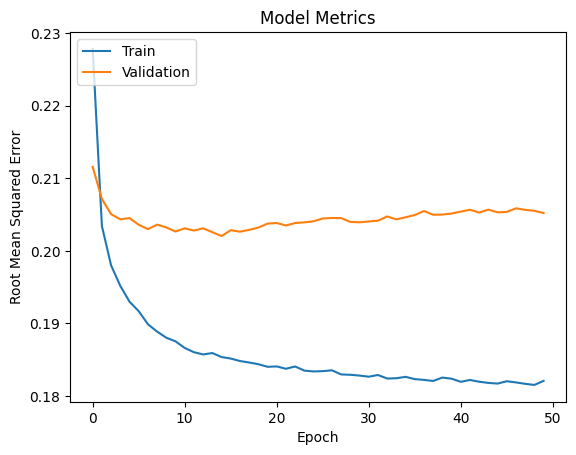

In [ ]:
# Plotting
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Setelah melakukan pelatihan model, melihat plot metrik RMSE yang menunjukkan kinerja model dalam bentuk grafik. Dari plot tersebut, dapat terlihat bahwa model menghasilkan nilai RMSE sebesar 0.1809 pada train dan 0.2052 pada validation. Angka ini menunjukkan bahwa kinerja model sudah cukup baik, karena nilai RMSE yang lebih rendah menunjukkan kesalahan yang lebih kecil dalam prediksi.

In [ ]:
df_metadata = pd.DataFrame(movie_data)

In [ ]:
# Rekomendasi Film untuk User
user_id = rating_small['userId'].sample(1).iloc[0]
movies_watched_by_user = rating_small[rating_small.userId == user_id]
movies_not_watched = df_metadata[~df_metadata['id'].isin(movies_watched_by_user.movieId.values)]['id']
movies_not_watched = list(set(movies_not_watched).intersection(set(movie_to_movie_encoded.keys())))
movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_watched), movies_not_watched))


In [ ]:
# Set user_id ke 99 (contoh user_id yang berbeda)
user_id = 121

# Ambil data film yang sudah ditonton oleh user
movies_watched_by_user = rating_small[rating_small['userId'] == user_id]

# Periksa apakah user memiliki data film yang ditonton
if movies_watched_by_user.empty:
    print(f"User ID {user_id} belum memiliki riwayat menonton.")
else:
    print(f"Rekomendasi untuk User {user_id}:")
    print("=" * 30)

    # Film dengan rating tinggi yang sudah ditonton
    print("Film dengan rating tinggi yang sudah ditonton:")
    top_movies_user = movies_watched_by_user.sort_values(by='rating', ascending=False).head(5)
    for row in top_movies_user.itertuples():
        try:
            movie_name = df_metadata[df_metadata['id'] == row.movieId]['title'].values[0]
            print(f"{movie_name}: {row.rating}")
        except IndexError:
            print(f"Film dengan ID {row.movieId} tidak ditemukan dalam metadata.")

    # Filter film yang belum ditonton oleh user
    movies_not_watched = movie_data[~movie_data['id'].isin(movies_watched_by_user['movieId'].values)]

    # Cek jika ada film yang belum ditonton
    if movies_not_watched.empty:
        print("Tidak ada film untuk direkomendasikan.")
    else:
        # Encode user dan film yang belum ditonton
        movies_not_watched = list(set(movies_not_watched['id'].values).intersection(set(movie_to_movie_encoded.keys())))
        movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]

        # Pastikan user_encoder ada untuk setiap user_id
        user_encoder = user_to_user_encoded.get(user_id)

        if user_encoder is None:
            print(f"User ID {user_id} tidak ditemukan dalam encoding user.")
        else:
            # Siapkan data untuk prediksi
            user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_watched), movies_not_watched))

            # Prediksi rating
            ratings = model.predict(user_movie_array).flatten()

            # Top 10 rekomendasi
            top_ratings_indices = ratings.argsort()[-10:][::-1]
            recommended_movie_ids = [
                movie_encoded_to_movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
            ]

            print("\nRekomendasi Film:")
            for movie_id in recommended_movie_ids:
                try:
                    movie_name = df_metadata[df_metadata['id'] == movie_id]['title'].values[0]
                    print(movie_name)
                except IndexError:
                    print(f"Film dengan ID {movie_id} tidak ditemukan dalam metadata.")


Rekomendasi untuk User 121:
Film dengan rating tinggi yang sudah ditonton:
The Passion of Joan of Arc: 5.0
Once Were Warriors: 5.0
The Million Dollar Hotel: 5.0
Faster, Pussycat! Kill! Kill!: 5.0
Rome, Open City: 5.0
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Rekomendasi Film:
The Celebration
Match Point
Taxi
Head-On
A Christmas Story
The Night of the Hunter
Gentlemen Prefer Blondes
Blown Away
Galaxy Quest
Sleepless in Seattle


# KESIMPULAN

Kesimpulan dari analisis ini menunjukkan bahwa model yang menggabungkan content-based filtering dan collaborative filtering berhasil memberikan hasil yang relevan dan akurat dalam sistem rekomendasi film. Melalui analisis dan pelatihan model, diperoleh hasil yang menunjukkan performa yang memadai. Berdasarkan plot metrik RMSE, model menghasilkan nilai RMSE sebesar 0.1809 pada data latih dan 0.2052 pada data validasi, yang menunjukkan bahwa kesalahan prediksi cukup rendah. Ini menandakan bahwa model telah belajar dengan baik dalam memprediksi preferensi pengguna dan karakteristik film. Selain itu, pendekatan ini dapat memberikan wawasan yang berguna dalam industri film dengan mengidentifikasi pola preferensi pengguna dan film yang sering dipilih, serta meningkatkan pengalaman pengguna melalui rekomendasi yang lebih personal dan relevan. Evaluasi model juga menunjukkan hasil yang sangat baik pada content-based filtering, dengan nilai precision sebesar 93.33%, yang menandakan bahwa model mampu memberikan rekomendasi yang sangat akurat sesuai dengan preferensi pengguna. Angka precision yang tinggi ini memperkuat efektivitas pendekatan content-based filtering dalam menyarankan film yang relevan berdasarkan kesamaan fitur atau atribut film. Gabungan kedua metode ini memungkinkan model untuk memanfaatkan kekuatan masing-masing, menghasilkan rekomendasi yang lebih baik dan lebih sesuai dengan kebutuhan pengguna.